# **📃<font color=#00836c>Credit EDA & Credit Score</font> Calculation with Python💳**</font>

<img src="https://cm-cdn.creditmantri.com/community/article/how-to-get-a-loan-with-a-low-credit-score.jpg">

## **Content**

- **1) Problem statement**
- **2) Expectations**
- **3) Concept Used**
- **4) Libraries**
- **5) Exploring the data**
- **6) Observations on Data**
- **7) Data preprocessing**
    - 7.1) Checking for Duplicates
    - 7.2) Missing value treatmen and Cleaning
    - 7.3) Feature Engineering
        - 7.3.1) Creating Cleaned dataframe
        - 7.3.2) Treating Month
        - 7.3.3) Treating Credit_Mix
        - 7.3.4) Treating Payment_of_Min_Amount
        - 7.3.5) Treating Payment_Behaviour
    - 7.4) Aggregate Data at Customer Level
- **8) Exploratory data analysis**
    - 8.1) Univariate Analysis
    - 8.2) Bivariate Analysis
- **9) Hypothetical Credit Score Calculation**
    - 9.1) Calculate credit score
    - 9.2) Bin scores
        - 9.2.1) Distribution of Credit Scores
    - 9.3) Time Frame Analysis for last 3 months
        - 9.3.1) Calculate RFM
        - 9.3.2) Distribution of Credit Scores
- **10) Analysis and Insights**  

## **1) <font color=#00836c>Problem</font> statement👀**

- To conduct a thorough **exploratory data analysis (EDA) and deep analysis** of a comprehensive dataset containing basic customer details and extensive credit-related information.
- The aim is to **create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights** within the data.

## **2) Expectations**

The project expects a deep dive into bank details and credit data, creating valuable features, a hypothetical credit score, and uncovering hidden patterns. This involves thorough EDA, strategic feature engineering, model-driven score calculation, and insightful analysis that reveals factors influencing creditworthiness and guides potential risk mitigation strategies.

## **3) Concept Used📑**
- Exploratory Data Analysis
- Credit Score Calculation

## **4) Libraries📚**

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **5) Exploring the data...🔎**

In [246]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/Fintech/Credit_score.csv")

In [247]:
# Set Pandas options to display all columns
pd.set_option('display.max_columns', 50)  # None to display all columns

In [248]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42015309,High_spent_Medium_value_payments,341.489231


In [249]:
# Checking the number of rows and columns
print(f"The number of rows: {data.shape[0]} \nThe number of columns: {data.shape[1]}")

The number of rows: 100000 
The number of columns: 27


In [250]:
# Check all column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

**🔍OBSERVATION🔎**

The dataset has **1,00,000 rows** and **27 columns**

**Column Name	Description:**

1. **ID:** Represents a unique identification of an entry.

2. **Customer_ID:** Represents a unique identification of a person.

3. **Month:** Represents the month of the year.

4. **Name:** Represents the name of a person.

5. **Age:** Represents the age of the person.
6. **SSN:** Represents the social security number of a person.

7. **Occupation:** Represents the occupation of the person.
8. **Annual_Income:** Represents the annual income of the person.

9. **Monthly_Inhand_Salary:** Represents the monthly base salary of a person.

10. **Num_Bank_Accounts:** Represents the number of bank accounts a person holds.

11. **Num_Credit_Card:** Represents the number of other credit cards held by a person.

12. **Interest_Rate:** Represents the interest rate on credit card.

13. **Num_of_Loan:** Represents the number of loans taken from the bank.

14. **Type_of_Loan:** Represents the types of loan taken by a person.

15. **Delay_from_due_date:** Represents the average number of days delayed from the payment date.

16. **Num_of_Delayed_Payment:** Represents the average number of payments delayed by a person.

17. **Changed_Credit_Limit:** Represents the percentage change in credit card limit.

18. **Num_Credit_Inquiries:** Represents the number of credit card inquiries.

19. **Credit_Mix:** Represents the classification of the mix of credits

20. **Outstanding_Debt:** Represents the remaining debt to be paid (in USD)

21. **Credit_Utilization_Ratio:** Represents the utilization ratio of credit card.

22. **Credit_History_Age:** Represents the age of credit history of the person.

23. **Payment_of_Min_Amount:** Represents whether only the minimum amount was paid by the person.

24. **Total_EMI_per_month:** Represents the monthly EMI payments (in USD)

25. **Amount_invested_monthly:** Represents the monthly amount invested by the customer (in USD)

26. **Payment_Behaviour:** Represents the payment behavior of the customer (in USD)

27. **Monthly_Balance:** Represents the monthly balance amount of the customer (in USD)

## **6) Observations on Data👀**

In [251]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [252]:
# Creating a deep copy
df = data.copy()

## **7) Data preprocessing🎰**

### <font color=#00836c>**7.1) Checking for Duplicates👬**</font>

In [253]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


### <font color=#00836c>**7.2) Missing value treatmen and Cleaning🧹**</font>

In [254]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
missing_value.sort_values(by='Percentage', ascending=False, inplace=True)
missing_value

,Missing Value,Percentage
Monthly_Inhand_Salary,15002,15.00
Type_of_Loan,11408,11.41
Name,9985,9.98
Credit_History_Age,9030,9.03
Num_of_Delayed_Payment,7002,7.00
Amount_invested_monthly,4479,4.48
Num_Credit_Inquiries,1965,1.96
Monthly_Balance,1200,1.20
Annual_Income,0,0.00
Credit_Mix,0,0.00


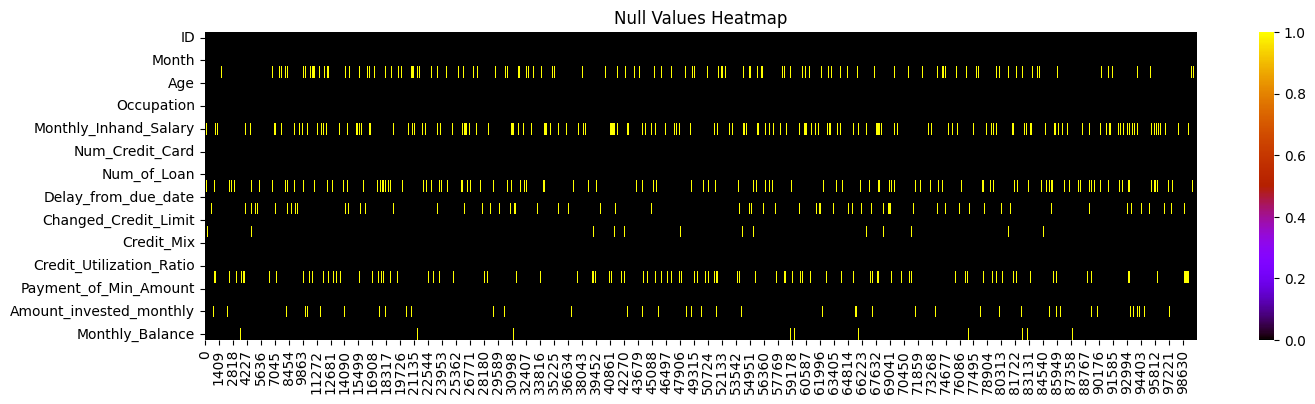

In [255]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(df.isnull().T, cmap='gnuplot')
plt.title('Null Values Heatmap')
plt.show()

#### <font color=#fa7f22>**1. ID**</font>

In [256]:
# Check the datatype
df['ID'].dtype

dtype('O')

In [257]:
# Check for nulls
df['ID'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**2. Customer_ID**</font>

In [258]:
# Check the datatype
df['Customer_ID'].dtype

dtype('O')

In [259]:
# Check for nulls
df['Customer_ID'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**3. Month**</font>

In [260]:
# Check the datatype
df['Month'].dtype

dtype('O')

In [261]:
# Check for nulls
df['Month'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**4. Name**</font>

In [262]:
# Dealing with Column Name
# Forward and backward fill
df['Name'] = df.groupby('Customer_ID')['Name'].ffill()
df['Name'] = df.groupby('Customer_ID')['Name'].bfill()

**🔍OBSERVATION🔎**

- The column Name has been delt with forward fill and backward fill after group by Customer_ID

#### <font color=#fa7f22>**5. Age**</font>

In [263]:
# Dealing with Age
df['Age'].dtype

dtype('O')

In [264]:
# Define the pattern to match values like '30_'
pattern = r'\d+_$'

# Replace values that match the pattern with NaN
df['Age'] = df['Age'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Replace values which are less than 0 with NaN
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)

In [265]:
# Check the number of nulls in column Age
df['Age'].isna().sum()

5825

In [266]:
#df.groupby('Customer_ID')['Age'].agg(pd.Series.mode)

In [267]:
# Not used but some alternative way
'''
def clean_age(value):
    # Replace '-' and non-numeric characters with NaN
    if isinstance(value, str) and not re.match(r'^\d+$', value):
        return np.nan
    return value

# Apply cleaning to the 'Age' column
df['Age'] = df['Age'].apply(clean_age)
'''

"\ndef clean_age(value):\n    # Replace '-' and non-numeric characters with NaN\n    if isinstance(value, str) and not re.match(r'^\\d+$', value):\n        return np.nan\n    return value\n\n# Apply cleaning to the 'Age' column\ndf['Age'] = df['Age'].apply(clean_age)\n"

In [268]:
# Not used but some alternative way
'''
def fill_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan

# Apply the function to each group
df['age'] = df.groupby('Customer_ID')['Age'].transform(fill_mode)
'''

"\ndef fill_mode(series):\n    mode_value = series.mode()\n    if not mode_value.empty:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n\n# Apply the function to each group\ndf['age'] = df.groupby('Customer_ID')['Age'].transform(fill_mode)\n"

In [269]:
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan

In [270]:
# Apply the function to each group
df['age'] = df.groupby('Customer_ID')['Age'].transform(fill_mode)

In [271]:
df['age'] = df['age'].astype('int64')

In [272]:
df['age'].min(), df['age'].max()

(14, 56)

In [273]:
df['age'].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 22, 36, 16, 18, 42, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [274]:
# Drop the Original Age column
df.drop(columns=['Age'], inplace=True)

**🔍OBSERVATION🔎**

- In this Age column we have values like 28_ and -500
- Replaced values that match the pattern with NaN
- Replaced values which are less than 0 with NaN
- Created the new column age and filled with mode values for each customer from the old column Age by defining a function.



#### <font color=#fa7f22>**6. SSN**</font>

In [275]:
# Dealing with SSN column
df['SSN'].dtype

dtype('O')

In [276]:
# Replace special character with NaN
df['SSN'] = df['SSN'].replace("#F%$D@*&8", np.nan)

In [277]:
# Check nulls
df['SSN'].isna().sum()

5572

In [278]:
# Forward and backward fill
df['SSN'] = df.groupby('Customer_ID')['SSN'].ffill()
df['SSN'] = df.groupby('Customer_ID')['SSN'].bfill()

In [279]:
# Check
df['SSN'].isna().sum()

0

**🔍OBSERVATION🔎**
- Replace special character "#F%$D@*&8" with NaN
- Forward and backward fill has been done to replace NaN

#### <font color=#fa7f22>**7. Occupation**</font>

In [280]:
# Dealing with occupation
# Check the datatype
df['Occupation'].dtype

dtype('O')

In [281]:
# Check unique values
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [282]:
# Replace _______ with NaN
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [283]:
# Check for nulls
df['Occupation'].isna().sum()

7062

In [284]:
# Forward and backward fill
df['Occupation']  = df.groupby('Customer_ID')['Occupation'].ffill()
df['Occupation']  = df.groupby('Customer_ID')['Occupation'].bfill()

In [285]:
# Check for nulls
df['Occupation'].isna().sum()

0

**🔍OBSERVATION🔎**
- Replace "_______" with NaN
- Forward and backward fill has been done to replace NaN

#### <font color=#fa7f22>**8. Annual_Income**</font>

In [286]:
# Dealiing with Annual_Income
# Check the datatype
df['Annual_Income'].dtype

dtype('O')

In [287]:
# Define the pattern to match values
pattern = r'_'

# Replace values that match the pattern with NaN
df['Annual_Income'] = df['Annual_Income'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

# To overcome the display problem from "9.067443e+04" to "19114.12"
# Option 1:
'''
Adjust Display Settings: Use pd.set_option('display.float_format', '{:.2f}'.format) to change the display format globally.
'''
# Set display options for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Option 2:
# Format the numbers for display from "9.067443e+04" to "19114.12"
# df['Annual_Income'] = df['Annual_Income'].apply(lambda x: f"{x:.2f}")

# Option 3:
# Round to 2 decimal places
#df['Annual_Income'] = df['Annual_Income'].round(2)

In [288]:
# Checking the display
df['Annual_Income'].head(12)

,Annual_Income
0,19114.12
1,19114.12
2,19114.12
3,19114.12
4,19114.12
5,19114.12
6,19114.12
7,19114.12
8,34847.84
9,34847.84


In [289]:
# Check for nulls
df['Annual_Income'].isna().sum()

6980

In [290]:
# Forward and backward fill
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].ffill()
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].bfill()

In [291]:
# Check for nulls
df['Annual_Income'].isna().sum()

0

In [292]:
# Check the datatype
df['Annual_Income'].dtype

dtype('float64')

**🔍OBSERVATION🔎**
- Replace values like "34847.84_" with NaN
- Forward and backward fill has been done to replace NaN

#### <font color=#fa7f22>**9. Monthly_Inhand_Salary**</font>

In [293]:
# Dealing with Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].dtype

dtype('float64')

In [294]:
# Check for nulls
df['Monthly_Inhand_Salary'].isna().sum()

15002

In [295]:
# Display
df['Monthly_Inhand_Salary'].head(8)

,Monthly_Inhand_Salary
0,1824.84
1,NaN
2,NaN
3,NaN
4,1824.84
5,NaN
6,1824.84
7,1824.84


In [296]:
'''
# Define a function to fill NaNs with the mode
def fill_mode_same_column(series):
  # series.mode.iloc[0] --> Since we are consider bimodal or multimodal
  mode_value = series.mode().iloc[0] if not series.mode().empty else np.nan
  return series.fillna(mode_value)
'''

'\n# Define a function to fill NaNs with the mode\ndef fill_mode_same_column(series):\n  # series.mode.iloc[0] --> Since we are consider bimodal or multimodal\n  mode_value = series.mode().iloc[0] if not series.mode().empty else np.nan\n  return series.fillna(mode_value)\n'

In [297]:
'''
# Apply the function using transform
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(fill_mode_same_column)
'''

"\n# Apply the function using transform\ndf['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(fill_mode_same_column)\n"

In [298]:
# Forward and backward fill
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].ffill()
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].bfill()

In [299]:
# Check for nulls
df['Monthly_Inhand_Salary'].isna().sum()

0

In [300]:
# Display check
df['Monthly_Inhand_Salary'].head(8)

,Monthly_Inhand_Salary
0,1824.84
1,1824.84
2,1824.84
3,1824.84
4,1824.84
5,1824.84
6,1824.84
7,1824.84


**🔍OBSERVATION🔎**
- Forward and backward fill has been done to replace NaN


#### <font color=#fa7f22>**10. Num_Bank_Accounts**</font>

In [301]:
# Dealing with Monthly_Inhand_Salary
df['Num_Bank_Accounts'].dtype

dtype('int64')

In [302]:
# Check for the number of rows having value -1
len(df[df['Num_Bank_Accounts'] == -1])

21

In [303]:
# Replace the value -1 with 0
df['Num_Bank_Accounts'].replace(-1, 0, inplace = True)

In [304]:
# Check for the number of rows having value -1
len(df[df['Num_Bank_Accounts'] == -1])

0

In [305]:
# For reference
'''
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan
'''

'\n# Define a function to create a new column to fill the mode values\ndef fill_mode(series):\n    mode_value = series.mode()\n    if mode_value is not None:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n'

In [306]:
# Apply the function using transform
df['num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(fill_mode)

In [307]:
df['num_Bank_Accounts'].min(), df['num_Bank_Accounts'].max()

(0, 10)

In [308]:
df['num_Bank_Accounts'].unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10])

In [309]:
# Drop the Original Age column
df.drop(columns=['Num_Bank_Accounts'], inplace=True)

In [310]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Replace the value -1 with 0
- Created the new column num_Bank_Accounts and fill with mode values for each customer from the old column Num_Bank_Accounts by defining a func

#### <font color=#fa7f22>**11. Num_Credit_Card**</font>

In [311]:
# Check the datatype
df['Num_Credit_Card'].dtype

dtype('int64')

In [312]:
# Check for nulls
df['Num_Credit_Card'].isna().sum()

0

In [313]:
# Random check
df[df['Customer_ID'] == "CUS_0x22be"][['Name', 'Num_Credit_Card']]

,Name,Num_Credit_Card
24976,arbara Lewish,1
24977,arbara Lewish,1
24978,arbara Lewish,1
24979,arbara Lewish,1
24980,arbara Lewish,0
24981,arbara Lewish,0
24982,arbara Lewish,0
24983,arbara Lewish,0


In [314]:
# For reference
'''
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan
'''

'\n# Define a function to create a new column to fill the mode values\ndef fill_mode(series):\n    mode_value = series.mode()\n    if mode_value is not None:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n'

In [315]:
# Apply the function using transform
df['num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(fill_mode)

In [316]:
# Drop the Original column
df.drop(columns=['Num_Credit_Card'], inplace=True)

In [317]:
df['num_Credit_Card'].min(), df['num_Credit_Card'].max()

(0, 11)

In [318]:
df['num_Credit_Card'].unique()

array([ 4,  5,  1,  7,  6,  8,  3,  9,  2, 10, 11,  0])

In [319]:
# Random check
df[df['Customer_ID'] == "CUS_0x22be"][['Name', 'num_Credit_Card']]

,Name,num_Credit_Card
24976,arbara Lewish,0
24977,arbara Lewish,0
24978,arbara Lewish,0
24979,arbara Lewish,0
24980,arbara Lewish,0
24981,arbara Lewish,0
24982,arbara Lewish,0
24983,arbara Lewish,0


**🔍OBSERVATION🔎**
- Created the new column and fill with mode values for each customer from the old column by defining a func

#### <font color=#fa7f22>**12. Interest_Rate**</font>

In [320]:
# Check the datatype
df['Interest_Rate'].dtype

dtype('int64')

In [321]:
df['Interest_Rate'].min(), df['Interest_Rate'].max()

(1, 5797)

In [322]:
# For reference
'''
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan
'''

'\n# Define a function to create a new column to fill the mode values\ndef fill_mode(series):\n    mode_value = series.mode()\n    if mode_value is not None:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n'

In [323]:
# Apply the function using transform
df['interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(fill_mode)

In [324]:
# Drop the Original column
df.drop(columns=['Interest_Rate'], inplace=True)

In [325]:
df['interest_Rate'].min(), df['interest_Rate'].max()

(1, 34)

In [326]:
df['interest_Rate'].unique()

array([ 3,  6,  8,  4,  5, 15,  7, 12, 20,  1, 14, 32, 16, 17, 10, 31, 25,
       18, 19,  9, 24, 13, 33, 11, 21, 29, 28, 30, 23, 34,  2, 27, 26, 22])

In [327]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Created the new column and fill with mode values for each customer from the old column by defining a func

#### <font color=#fa7f22>**13. Num_of_Loan**</font>

**Method 1:**

In [328]:
# Check the datatype
df['Num_of_Loan'].dtype

dtype('O')

In [329]:
# Define the pattern to match values
pattern = r'-\d+|\d+_$|\d_'

# Replace values that match the pattern with NaN
df['Num_of_Loan'] = df['Num_of_Loan'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

In [330]:
# Define a function to fill NaN values with the mode
def fill_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return mode_value[0]  # Use the first mode if there are multiple modes
    else:
        return np.nan

In [331]:
# Apply the function to fill NaN values with the mode for each Customer_ID
df['num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(fill_mode)

In [332]:
# Change the datatype
df['num_of_Loan'] = df['num_of_Loan'].astype('int')

In [333]:
df['num_of_Loan'].unique()

array([4, 1, 3, 0, 2, 7, 5, 6, 8, 9])

In [334]:
df['num_of_Loan'].value_counts()

,count
num_of_Loan,
3,15752
2,15712
4,15456
0,11408
1,11128
6,8144
7,7680
5,7528
9,3856


**Method 2:**

In [335]:
df['Type_of_Loan'].head(40)

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
5,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
6,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
7,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
8,Credit-Builder Loan
9,Credit-Builder Loan


In [336]:
# Check
a = df['Type_of_Loan'][0]
a

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [337]:
# Check
len(a.split(","))

4

In [338]:
# Check
b = df['Type_of_Loan'][8]
b

'Credit-Builder Loan'

In [339]:
# Check
len(b.split(","))

1

In [340]:
# Check
c = df['Type_of_Loan'][32]

In [341]:
# Check
type(c)

float

In [342]:
# Logic for the function
x = df['Type_of_Loan'][32]
#x = df['Type_of_Loan'][0]

if isinstance(x, float):
  print(0)
else:
  print(len(x.split(",")))

0


In [343]:
# Define a function to count the Num_of_Loan from Type_of_Loan column
def len_of_list(elem):
  if isinstance(elem, float):
    return 0
  else:
    return len(elem.split(','))

In [344]:
# Apply the function using transform
df['num_of_Loan_check'] = df['Type_of_Loan'].transform(len_of_list)

In [345]:
df['num_of_Loan_check'].unique()

array([4, 1, 3, 0, 2, 7, 5, 6, 8, 9])

In [346]:
df['num_of_Loan_check'].value_counts()

,count
num_of_Loan_check,
3,15752
2,15712
4,15456
0,11408
1,11128
6,8144
7,7680
5,7528
9,3856


In [347]:
df.shape

(100000, 29)

In [348]:
# Drop the Original column
df.drop(columns=['Num_of_Loan','num_of_Loan_check'], inplace=True)

In [349]:
df.shape

(100000, 27)

In [350]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'age', 'num_Bank_Accounts', 'num_Credit_Card', 'interest_Rate',
       'num_of_Loan'],
      dtype='object')

**🔍OBSERVATION🔎**
- Define the pattern to match values
- Replace values that match the pattern with NaN
- Define a function to fill NaN values with the mode

#### <font color=#fa7f22>**14. Type_of_Loan**</font>

In [351]:
# Check the datatype
df['Type_of_Loan'].dtype

dtype('O')

In [352]:
# Check for nulls
df['Type_of_Loan'].isna().sum()

11408

In [353]:
value = "No Loan Status"
df['Type_of_Loan'].fillna(value, inplace=True)

In [354]:
# Check for nulls
df['Type_of_Loan'].isna().sum()

0

**🔍OBSERVATION🔎**

- Replaced the null values with "No Loan Status"

#### <font color=#fa7f22>**15. Delay_from_due_date**</font>

**Method 1:**

In [355]:
# Check the datatype
df['Delay_from_due_date'].dtype

dtype('int64')

In [356]:
df['Delay_from_due_date'].head(8)

,Delay_from_due_date
0,3
1,-1
2,3
3,5
4,6
5,8
6,3
7,3


In [357]:
# Replace values which are less than 0 with NaN
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: np.nan if x < 0 else x)

In [358]:
# Check for nulls
df['Delay_from_due_date'].isna().sum()

591

In [359]:
# Define a function to fill NaNs with the mode
def fill_mode_same_column(series):
  # series.mode.iloc[0] --> Since we are consider bimodal or multimodal
  mode_value = series.mode().iloc[0] if not series.mode().empty else np.nan
  return series.fillna(mode_value)

In [360]:
# Apply the function using transform
df['Delay_from_due_date'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform(fill_mode_same_column)

In [361]:
# Chenge the datatype
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype('int')

In [362]:
# Check for nulls
df['Delay_from_due_date'].isna().sum()

0

In [363]:
df['Delay_from_due_date'].min(), df['Delay_from_due_date'].max()

(0, 67)

In [364]:
df['Delay_from_due_date'].head(8)

,Delay_from_due_date
0,3
1,3
2,3
3,5
4,6
5,8
6,3
7,3


**🔍OBSERVATION🔎**
- Replace values which are less than 0 with NaN
- A function is defined to fill NaNs with the mode

#### <font color=#fa7f22>**16. Num_of_Delayed_Payment**</font>

In [365]:
df['Num_of_Delayed_Payment'].dtype

dtype('O')

In [366]:
# Define the pattern to match values
pattern = r'-\d+|\d+_$|\d_'

# Replace values that match the pattern with NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [367]:
# Check for datatype
df['Num_of_Delayed_Payment'].dtype

dtype('float64')

In [368]:
# Check for nulls
df['Num_of_Delayed_Payment'].isna().sum()

10368

In [369]:
# For reference
'''
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan
'''

'\n# Define a function to create a new column to fill the mode values\ndef fill_mode(series):\n    mode_value = series.mode()\n    if mode_value is not None:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n'

In [370]:
# Apply the function using transform
df['num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(fill_mode)

In [371]:
# Check for nulls
df['num_of_Delayed_Payment'].isna().sum()

0

In [372]:
# Chenge the datatype
df['num_of_Delayed_Payment'] = df['num_of_Delayed_Payment'].astype('int')

In [373]:
df['num_of_Delayed_Payment'].min(), df['num_of_Delayed_Payment'].max()

(0, 28)

In [374]:
df['num_of_Delayed_Payment'].unique()

array([ 4,  6, 15,  7,  2, 14, 11,  0, 20,  8,  9, 10, 12, 19, 21, 16, 17,
       18, 24,  5, 23, 22, 13,  3,  1, 25, 28, 27, 26])

In [375]:
df.drop(columns=['Num_of_Delayed_Payment'], inplace=True)

In [376]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Cleaned the original coluumn and replaced the wrong elements with NaN.
- Created new column and filled with mode values after groupby.

#### <font color=#fa7f22>**17. Changed_Credit_Limit**</font>

In [377]:
df['Changed_Credit_Limit'].dtype

dtype('O')

In [378]:
# Define the pattern to match values
pattern = r'_'

# Replace values that match the pattern with NaN
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [379]:
# Check for nulls
df['Changed_Credit_Limit'].isna().sum()

2091

In [380]:
# Forward and backward fill
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].ffill()
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].bfill()

In [381]:
# Check for nulls
df['Changed_Credit_Limit'].isna().sum()

0

In [382]:
df['Changed_Credit_Limit'].min(), df['Changed_Credit_Limit'].max()

(-6.49, 36.97)

**🔍OBSERVATION🔎**
- Clean and done forward and backward fill for NaN values.

#### <font color=#fa7f22>**18. Num_Credit_Inquiries**</font>

In [383]:
df['Num_Credit_Inquiries'].dtype

dtype('float64')

In [384]:
df['Num_Credit_Inquiries'].min(), df['Num_Credit_Inquiries'].max()

(0.0, 2597.0)

In [385]:
# For reference
'''
# Define a function to create a new column to fill the mode values
def fill_mode(series):
    mode_value = series.mode()
    if mode_value is not None:
        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan
'''

'\n# Define a function to create a new column to fill the mode values\ndef fill_mode(series):\n    mode_value = series.mode()\n    if mode_value is not None:\n        return mode_value[0] # chances of bimodal values here we consider the first value since year of happening is not mentioned.\n    else:\n        return np.nan\n'

In [386]:
# Apply the function using transform
df['num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(fill_mode)

In [387]:
df['num_Credit_Inquiries'] = df['num_Credit_Inquiries'].astype('int')

In [388]:
# Check for nulls
df['num_Credit_Inquiries'].isna().sum()

0

In [389]:
df['num_Credit_Inquiries'].unique()

array([ 4,  2,  3,  5,  8,  6,  1,  7,  0, 17,  9, 10, 11, 14, 12, 16, 15,
       13])

In [390]:
df['num_Credit_Inquiries'].min(), df['num_Credit_Inquiries'].max()

(0, 17)

In [391]:
df.drop(columns=['Num_Credit_Inquiries'], inplace=True)

In [392]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Created a new column and replace nulls with mode of original column after groupby.

#### <font color=#fa7f22>**19. Credit_Mix**</font>

In [393]:
df['Credit_Mix'].dtype

dtype('O')

In [394]:
len(df.loc[df['Credit_Mix'] == '_'])

20195

In [395]:
# Define the pattern to match values
pattern = r'_'

# Replace values that match the pattern with NaN
df['Credit_Mix'] = df['Credit_Mix'].replace(to_replace=pattern, value=np.nan, regex=True)

In [396]:
# Forward and backward fill
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].ffill()
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].bfill()

In [397]:
df['Credit_Mix'].isna().sum()

0

**🔍OBSERVATION🔎**
- Cleaned and done forward and backward fill.

#### <font color=#fa7f22>**20. Outstanding_Debt**</font>

In [398]:
# Check the datatype
df['Outstanding_Debt'].dtype

dtype('O')

In [399]:
# Define the pattern to match values
pattern = r'_'

# Replace values that match the pattern with NaN
df['Outstanding_Debt'] = df['Outstanding_Debt'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [400]:
# Check for nulls
df['Outstanding_Debt'].isna().sum()

1009

In [401]:
# Forward and backward fill
df['Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].ffill()
df['Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].bfill()

In [402]:
# Check for nulls
df['Outstanding_Debt'].isna().sum()

0

In [403]:
# Check the datatype
df['Outstanding_Debt'].dtype

dtype('float64')

**🔍OBSERVATION🔎**
- Cleaned and done forward and backward fill.

#### <font color=#fa7f22>**21. Credit_Utilization_Ratio**</font>

In [404]:
# Check the datatype
df['Credit_Utilization_Ratio'].dtype

dtype('float64')

In [405]:
# Check for nulls
df['Credit_Utilization_Ratio'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**22. Credit_History_Age**</font>

In [406]:
# Check the datatype
df['Credit_History_Age'].dtype

dtype('O')

In [407]:
# Check for nulls
df['Credit_History_Age'].isna().sum()

9030

In [408]:
# Created a column by splitting the elements
df['Credit_History_Age_list'] = df['Credit_History_Age'].str.split()

In [409]:
df['Credit_History_Age_list'].head()

,Credit_History_Age_list
0,"[22, Years, and, 1, Months]"
1,NaN
2,"[22, Years, and, 3, Months]"
3,"[22, Years, and, 4, Months]"
4,"[22, Years, and, 5, Months]"


In [410]:
type(df['Credit_History_Age_list'][1]) == float

True

In [411]:
# Define a function to extract the year
def split_CRA(lst):
  #if type(lst) == float:
  if isinstance(lst, float):
    return 0
  else:
    return int(lst[0])

In [412]:
# Apply the function
df['Credit_History_Age_all'] = df['Credit_History_Age_list'].apply(split_CRA)

In [413]:
# Apply the function
df['credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age_all'].transform(lambda series: series.max())

In [414]:
df.drop(columns=['Credit_History_Age', 'Credit_History_Age_list', 'Credit_History_Age_all'], inplace=True)

In [415]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Created a new column and taken the max value after group by.

#### <font color=#fa7f22>**23. Payment_of_Min_Amount**</font>

In [416]:
df['Payment_of_Min_Amount'].dtype

dtype('O')

In [417]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [418]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')

In [419]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,47674


**🔍OBSERVATION🔎**
- Replaced 'NM' with 'No'

#### <font color=#fa7f22>**24. Total_EMI_per_month**</font>

In [420]:
df['Total_EMI_per_month'].dtype

dtype('float64')

In [421]:
df['Total_EMI_per_month'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is clean

#### <font color=#fa7f22>**25. Amount_invested_monthly**</font>

In [422]:
# Check the datatype
df['Amount_invested_monthly'].dtype

dtype('O')

In [423]:
# Define the pattern to match values
pattern = r'__\d+__$'

# Replace values that match the pattern with NaN
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(to_replace=pattern, value=np.nan, regex=True)

# Convert 'Annual_Income' column to numeric, coercing errors to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [424]:
# Check for nulls
df['Amount_invested_monthly'].isna().sum()

8784

In [425]:
# Fill nulls with 0
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

In [426]:
# Check for nulls
df['Amount_invested_monthly'].isna().sum()

0

In [427]:
# Check the datatype
df['Amount_invested_monthly'].dtype

dtype('float64')

**🔍OBSERVATION🔎**
- Cleaned and filled nulls with 0

#### <font color=#fa7f22>**26. Payment_Behaviour**</font>

In [428]:
# Check the datatype
df['Payment_Behaviour'].dtype

dtype('O')

In [429]:
# Replace the "!@9#%8" with NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)

In [430]:
# Check for nulls
df['Payment_Behaviour'].isna().sum()

7600

In [431]:
# Forward fill and Backward fill
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].ffill()
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].bfill()

In [432]:
# Check for nulls
df['Payment_Behaviour'].isna().sum()

0

**🔍OBSERVATION🔎**
- The column is cleane and filled nulls with forward or backward values

#### <font color=#fa7f22>**27. Monthly_Balance**</font>

In [433]:
# Check the datatype
df['Monthly_Balance'].dtype

dtype('O')

In [434]:
# Convert to numeric
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [435]:
# Check the datatype
df['Monthly_Balance'].dtype

dtype('float64')

In [436]:
# Fill nulls with 0
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

In [437]:
# Check for nulls
df['Monthly_Balance'].isna().sum()

0

In [438]:
df.shape

(100000, 27)

**🔍OBSERVATION🔎**
- Converted to numeric and filled nulls with 0

### <font color=#00836c>**7.3) Feature Engineering🔩🪛**</font>

#### <font color=#fa7f22>**7.3.1) Creating Cleaned dataframe**</font>

In [439]:
# Deep copy
df_processed = df.copy()

In [440]:
# Renamed the newly created column to the same original column
rename_dict = {'age':'Age',
               'num_Bank_Accounts':'Num_Bank_Accounts',
               'num_Credit_Card':'Num_Credit_Card',
               'interest_Rate':'Interest_Rate',
               'num_of_Loan':'Num_of_Loan',
               'num_of_Delayed_Payment':'Num_of_Delayed_Payment',
               'num_Credit_Inquiries': 'Num_Credit_Inquiries',
               'credit_History_Age': 'Credit_History_Age'}

df_processed = df_processed.rename(columns = rename_dict)

# Changing the order of column as original columns
new_column_order = [
    'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
    'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
]

df_cleaned = df_processed.reindex(columns=new_column_order)

#### <font color=#fa7f22>**7.3.2) Treating Month**</font>

In [441]:
# Convert month names to month numbers and replace in the same column
df_cleaned['Month_num'] = pd.to_datetime(df_cleaned['Month'], format='%B').dt.month

#### <font color=#fa7f22>**7.3.3) *Treating* Credit_Mix**</font>

In [442]:
df_cleaned['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [443]:
# Define a function for assigning numbers for Credit_Mix
def credit_mix(elem):
  if elem == "Good":
    return 2
  elif elem == "Standard":
    return 1
  else:
    return 0

In [444]:
# Apply the function using transform
df_cleaned['Credit_Mix_eq_no'] = df_cleaned['Credit_Mix'].transform(credit_mix)

#### <font color=#fa7f22>**7.3.4) Treating Payment_of_Min_Amount**</font>

In [445]:
df_cleaned['Payment_of_Min_Amount'].unique()

array(['No', 'Yes'], dtype=object)

In [446]:
# Define a function for assigning numbers for Payment_of_Min_Amount
def Payment_of_Min_Amount(elem):
  if elem == 'Yes':
    return 1
  else:
    return 0

In [447]:
# Apply the function using transform
df_cleaned['Payment_of_Min_Amount_eq_no'] = df_cleaned['Payment_of_Min_Amount'].transform(Payment_of_Min_Amount)

#### <font color=#fa7f22>**7.3.5) Treating Payment_Behaviour**</font>

In [448]:
# Define mapping
payment_behaviour_mapping = {
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6,
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3
}
# Apply mapping
df_cleaned['Payment_Behaviour_Num'] = df_cleaned['Payment_Behaviour'].map(payment_behaviour_mapping)

**🔍OBSERVATION🔎**
- High_spent_Small_value_payments: Likely to indicate high spending habits with small payments, which might be risky if the behavior is consistent.
- High_spent_Medium_value_payments: Indicates high spending with medium payments, potentially a higher risk.
- High_spent_Large_value_payments: Shows high spending with large payments, which might indicate high financial risk.
- Low_spent_Small_value_payments: Shows low spending with small payments, likely less risky.
- Low_spent_Medium_value_payments: Low spending with medium payments, potentially moderate risk.
- Low_spent_Large_value_payments: Low spending with large payments, might be less risky but could indicate underutilization of credit.

In [449]:
# Download the cleaned file
# df_cleaned.to_csv('Credit_score_cleaned', sep=",",index=False)

In [450]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  int64  
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  float64
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int64  
 10  Num_Credit_Card              100000 non-null  int64  
 11  Interest_Rate                100000 non-null  int64  
 12  Num_of_Loan                  100000 non-null  int64  
 13  

In [451]:
# Columns that are in int and float datatype
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes != 'object':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

5. Age: (43, dtype('int64'))
8. Annual_Income: (13437, dtype('float64'))
9. Monthly_Inhand_Salary: (13235, dtype('float64'))
10. Num_Bank_Accounts: (11, dtype('int64'))
11. Num_Credit_Card: (12, dtype('int64'))
12. Interest_Rate: (34, dtype('int64'))
13. Num_of_Loan: (10, dtype('int64'))
15. Delay_from_due_date: (68, dtype('int64'))
16. Num_of_Delayed_Payment: (29, dtype('int64'))
17. Changed_Credit_Limit: (3634, dtype('float64'))
18. Num_Credit_Inquiries: (18, dtype('int64'))
20. Outstanding_Debt: (12203, dtype('float64'))
21. Credit_Utilization_Ratio: (99998, dtype('float64'))
22. Credit_History_Age: (34, dtype('int64'))
24. Total_EMI_per_month: (14950, dtype('float64'))
25. Amount_invested_monthly: (91048, dtype('float64'))
27. Monthly_Balance: (98790, dtype('float64'))
28. Month_num: (8, dtype('int32'))
29. Credit_Mix_eq_no: (3, dtype('int64'))
30. Payment_of_Min_Amount_eq_no: (2, dtype('int64'))
31. Payment_Behaviour_Num: (6, dtype('int64'))


In [452]:
# Columns that are in object datatype
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes == 'O':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

1. ID: (100000, dtype('O'))
2. Customer_ID: (12500, dtype('O'))
3. Month: (8, dtype('O'))
4. Name: (10139, dtype('O'))
6. SSN: (12500, dtype('O'))
7. Occupation: (15, dtype('O'))
14. Type_of_Loan: (6261, dtype('O'))
19. Credit_Mix: (3, dtype('O'))
23. Payment_of_Min_Amount: (2, dtype('O'))
26. Payment_Behaviour: (6, dtype('O'))


### <font color=#00836c>**7.4) Aggregate Data at Customer Level**</font>

In [453]:
# Creating a dictionary for aggregation at Customer_ID level
agg_dict = {
    'ID': 'first',
     # Grouped by on Customer_ID so not included
    'Name': 'first',
    'Age': 'first',
    'SSN': 'first',
    'Occupation': 'first',
    'Annual_Income': 'first',
    'Monthly_Inhand_Salary': 'first',
    'Num_Bank_Accounts': 'first',
    'Num_Credit_Card': 'first',
    'Interest_Rate': 'first',
    'Num_of_Loan': 'first',
    'Type_of_Loan': 'first',
    'Delay_from_due_date': 'mean',
    'Num_of_Delayed_Payment': 'first',
    'Changed_Credit_Limit': 'mean',
    'Num_Credit_Inquiries': 'first',
    'Credit_Mix': 'first',
    'Outstanding_Debt': 'first',
    'Credit_Utilization_Ratio': 'mean',
    'Credit_History_Age': 'first',
    'Payment_of_Min_Amount': 'first',
    'Total_EMI_per_month': 'first',
    'Amount_invested_monthly': 'mean',
    # Payment_Behaviour not included
    'Monthly_Balance': 'mean',
    'Credit_Mix_eq_no': 'first',
    'Payment_of_Min_Amount_eq_no': 'first',
    'Payment_Behaviour_Num': 'mean'
}
df_aggregated = df_cleaned.groupby('Customer_ID').agg(agg_dict).reset_index()

In [454]:
df_aggregated.head()

,Customer_ID,ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_eq_no,Payment_of_Min_Amount_eq_no,Payment_Behaviour_Num
0,CUS_0x1000,0x1628a,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.16,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62.25,25,1.88,11,Bad,1562.91,33.48,10,Yes,42.94,158.55,335.38,0,1,3.75
1,CUS_0x1009,0x66a2,Arunah,26,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",7.25,18,9.73,2,Standard,202.68,29.84,31,No,108.37,146.68,428.74,1,0,4.50
2,CUS_0x100b,0x1ef6,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.78,1,4,1,0,No Loan Status,13.50,7,10.96,1,Good,1030.20,34.84,15,No,0.00,379.04,781.23,2,0,3.75
3,CUS_0x1011,0x17646,Schneyerh,44,793-05-8223,Doctor,58918.47,5208.87,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27.25,15,14.17,7,Standard,473.14,27.66,15,Yes,123.43,272.18,332.64,1,1,3.00
4,CUS_0x1013,0x243ea,Cameront,44,930-49-9615,Mechanic,98620.98,7962.41,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12.50,9,1.71,3,Good,1233.51,31.93,17,No,228.02,355.44,472.78,2,0,4.38


In [455]:
# Download the cleaned file
#df_aggregated.to_csv('Credit_score_cleaned_aggregated', sep=",",index=False)

In [456]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  12500 non-null  object 
 1   ID                           12500 non-null  object 
 2   Name                         12500 non-null  object 
 3   Age                          12500 non-null  int64  
 4   SSN                          12500 non-null  object 
 5   Occupation                   12500 non-null  object 
 6   Annual_Income                12500 non-null  float64
 7   Monthly_Inhand_Salary        12500 non-null  float64
 8   Num_Bank_Accounts            12500 non-null  int64  
 9   Num_Credit_Card              12500 non-null  int64  
 10  Interest_Rate                12500 non-null  int64  
 11  Num_of_Loan                  12500 non-null  int64  
 12  Type_of_Loan                 12500 non-null  object 
 13  Delay_from_due_d

In [457]:
# Columns that are in int and float datatype
for i, elem in (enumerate(df_aggregated.columns)):
  if df_aggregated[elem].dtypes != 'object':
    print(f"{i+1}. {elem}: {df_aggregated[elem].nunique(), df_aggregated[elem].dtypes}")

4. Age: (43, dtype('int64'))
7. Annual_Income: (12489, dtype('float64'))
8. Monthly_Inhand_Salary: (12489, dtype('float64'))
9. Num_Bank_Accounts: (11, dtype('int64'))
10. Num_Credit_Card: (12, dtype('int64'))
11. Interest_Rate: (34, dtype('int64'))
12. Num_of_Loan: (10, dtype('int64'))
14. Delay_from_due_date: (506, dtype('float64'))
15. Num_of_Delayed_Payment: (29, dtype('int64'))
16. Changed_Credit_Limit: (4796, dtype('float64'))
17. Num_Credit_Inquiries: (18, dtype('int64'))
19. Outstanding_Debt: (12203, dtype('float64'))
20. Credit_Utilization_Ratio: (12500, dtype('float64'))
21. Credit_History_Age: (34, dtype('int64'))
23. Total_EMI_per_month: (11114, dtype('float64'))
24. Amount_invested_monthly: (12500, dtype('float64'))
25. Monthly_Balance: (12500, dtype('float64'))
26. Credit_Mix_eq_no: (3, dtype('int64'))
27. Payment_of_Min_Amount_eq_no: (2, dtype('int64'))
28. Payment_Behaviour_Num: (41, dtype('float64'))


In [458]:
# Columns that are in object datatype
for i, elem in (enumerate(df_aggregated.columns)):
  if df_aggregated[elem].dtypes == 'O':
    print(f"{i+1}. {elem}: {df_aggregated[elem].nunique(), df_aggregated[elem].dtypes}")

1. Customer_ID: (12500, dtype('O'))
2. ID: (12500, dtype('O'))
3. Name: (10139, dtype('O'))
5. SSN: (12500, dtype('O'))
6. Occupation: (15, dtype('O'))
13. Type_of_Loan: (6261, dtype('O'))
18. Credit_Mix: (3, dtype('O'))
22. Payment_of_Min_Amount: (2, dtype('O'))


In [459]:
# Display the range of attributes
print("Range of attributes:")
print("-" * 20)
df_aggregated.describe(include='all').T

Range of attributes:
--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,12500,12500,CUS_0x1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,12500,12500,0x1628a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,12500,10139,Jessicad,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12500.00,NaN,NaN,NaN,33.28,10.77,14.00,24.00,33.00,42.00,56.00
SSN,12500,12500,913-74-1218,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,12500,15,Lawyer,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,12500.00,NaN,NaN,NaN,191047.36,1492867.76,7005.93,19491.20,37667.56,72957.64,23658189.00
Monthly_Inhand_Salary,12500.00,NaN,NaN,NaN,4208.49,3194.90,303.65,1628.94,3103.64,5971.36,15204.63
Num_Bank_Accounts,12500.00,NaN,NaN,NaN,5.37,2.59,0.00,3.00,5.00,7.00,10.00
Num_Credit_Card,12500.00,NaN,NaN,NaN,5.53,2.07,0.00,4.00,5.00,7.00,11.00


In [460]:
# Display the statistical summary
print("statistical summary:")
print("-" * 20)
df_aggregated.describe().T

statistical summary:
--------------------


,count,mean,std,min,25%,50%,75%,max
Age,12500.00,33.28,10.77,14.00,24.00,33.00,42.00,56.00
Annual_Income,12500.00,191047.36,1492867.76,7005.93,19491.20,37667.56,72957.64,23658189.00
Monthly_Inhand_Salary,12500.00,4208.49,3194.90,303.65,1628.94,3103.64,5971.36,15204.63
Num_Bank_Accounts,12500.00,5.37,2.59,0.00,3.00,5.00,7.00,10.00
Num_Credit_Card,12500.00,5.53,2.07,0.00,4.00,5.00,7.00,11.00
Interest_Rate,12500.00,14.53,8.74,1.00,7.00,13.00,20.00,34.00
Num_of_Loan,12500.00,3.53,2.45,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,12500.00,21.09,14.74,0.00,9.88,17.88,28.00,63.25
Num_of_Delayed_Payment,12500.00,13.26,6.20,0.00,9.00,14.00,18.00,28.00
Changed_Credit_Limit,12500.00,10.39,6.54,-1.07,5.45,9.37,14.66,31.40


## **8) Exploratory data analysis**📊📈

### <font color=#00836c>**8.1) Univariate Analysis📈**</font>

In [461]:
green_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#66CDAA', '#7FFF00', '#00FF7F', '#98FB98', '#ADFF2F']

In [462]:
columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

for elem in columns:
  print(f"Column Name: {elem}")
  print(data[elem].value_counts())
  print()
  print(round(((data[elem].value_counts(normalize=True)) * 100),2))
  print("_" * 35)
  print()

Column Name: Occupation
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

Occupation
_______         7.06
Lawyer          6.58
Architect       6.36
Engineer        6.35
Scientist       6.30
Mechanic        6.29
Accountant      6.27
Developer       6.24
Media_Manager   6.23
Teacher         6.22
Entrepreneur    6.17
Doctor          6.09
Journalist      6.08
Manager         5.97
Musician        5.91
Writer          5.88
Name: proportion, dtype: float64
___________________________________

Column Name: Credit_Mix
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

Credit_Mix
Standard   36.48
Good   

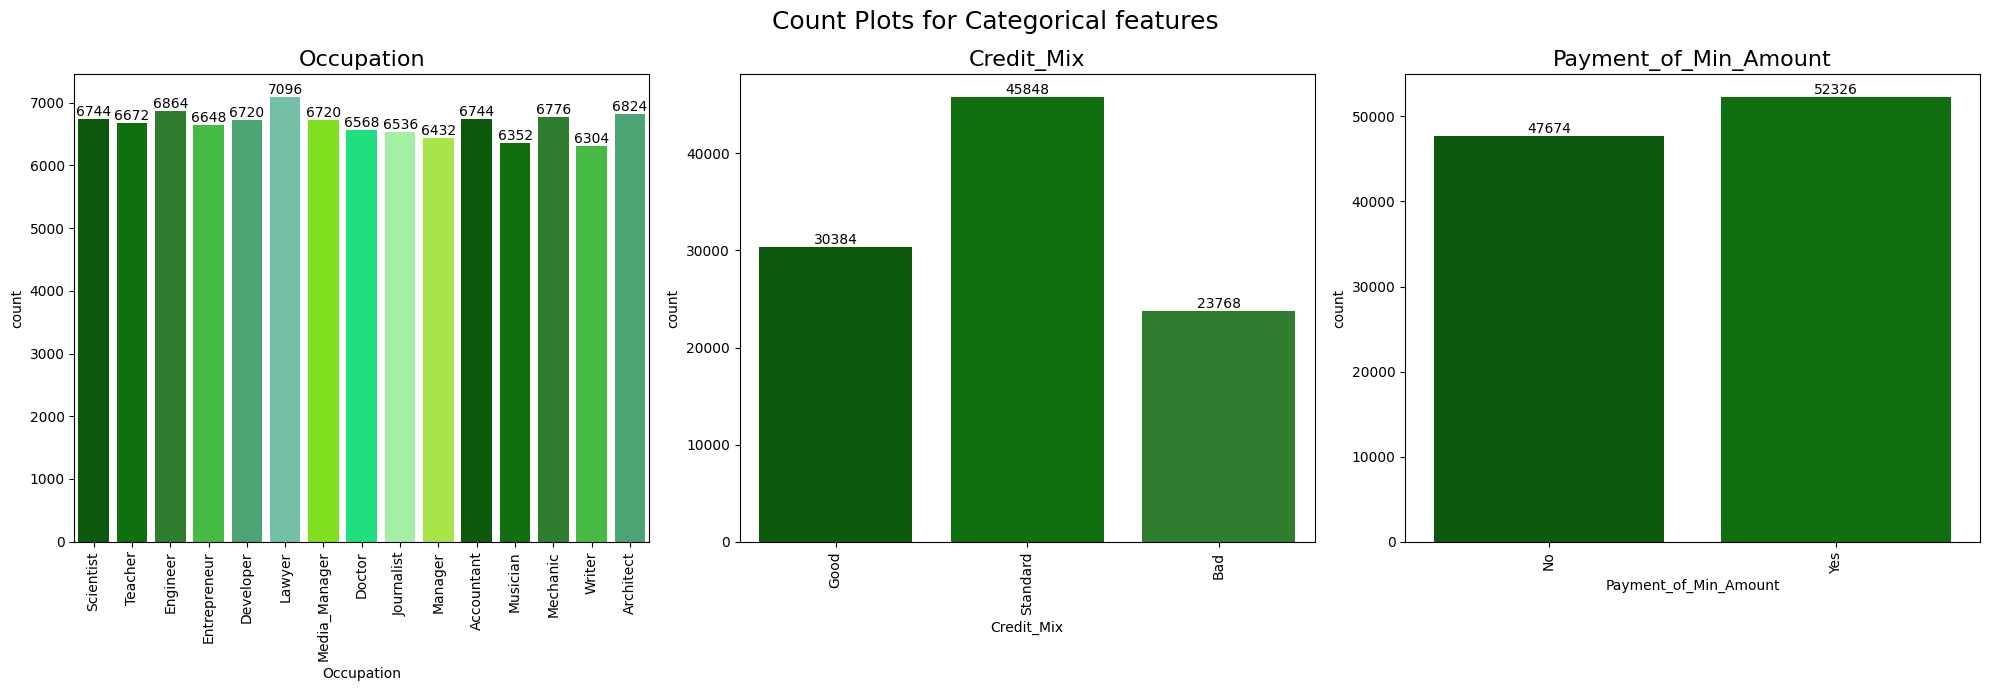

In [463]:
# Count Plots for Categorical features
columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

plt.figure(figsize=(20,7))
for i, elem in enumerate(columns):
  plt.subplot(1,len(columns),i+1)
  label = sns.countplot(data = df, x = elem, palette = green_palette)
  for i in label.containers:
    label.bar_label(i)

  plt.xticks(rotation = 90)
  plt.ylabel('count')
  plt.title(elem, fontsize=16)

plt.suptitle("Count Plots for Categorical features", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- **Occupation**
    - The most common occupations are evenly distributed among high-education or professional roles, such as Lawyer, Architect, Engineer, and Scientist, with a significant proportion of individuals in these roles compared to others.

- **Credit_Mix**
    - The majority of individuals have a "Standard" credit mix, making up 36.48% of the data, while "Good" and "Bad" credit mixes are less prevalent, indicating a generally positive credit mix distribution.

- **Payment_of_Min_Amount**
    - A majority of customers (52.33%) consistently make the minimum payment amount, which suggests a significant portion of the population is managing their payments minimally.

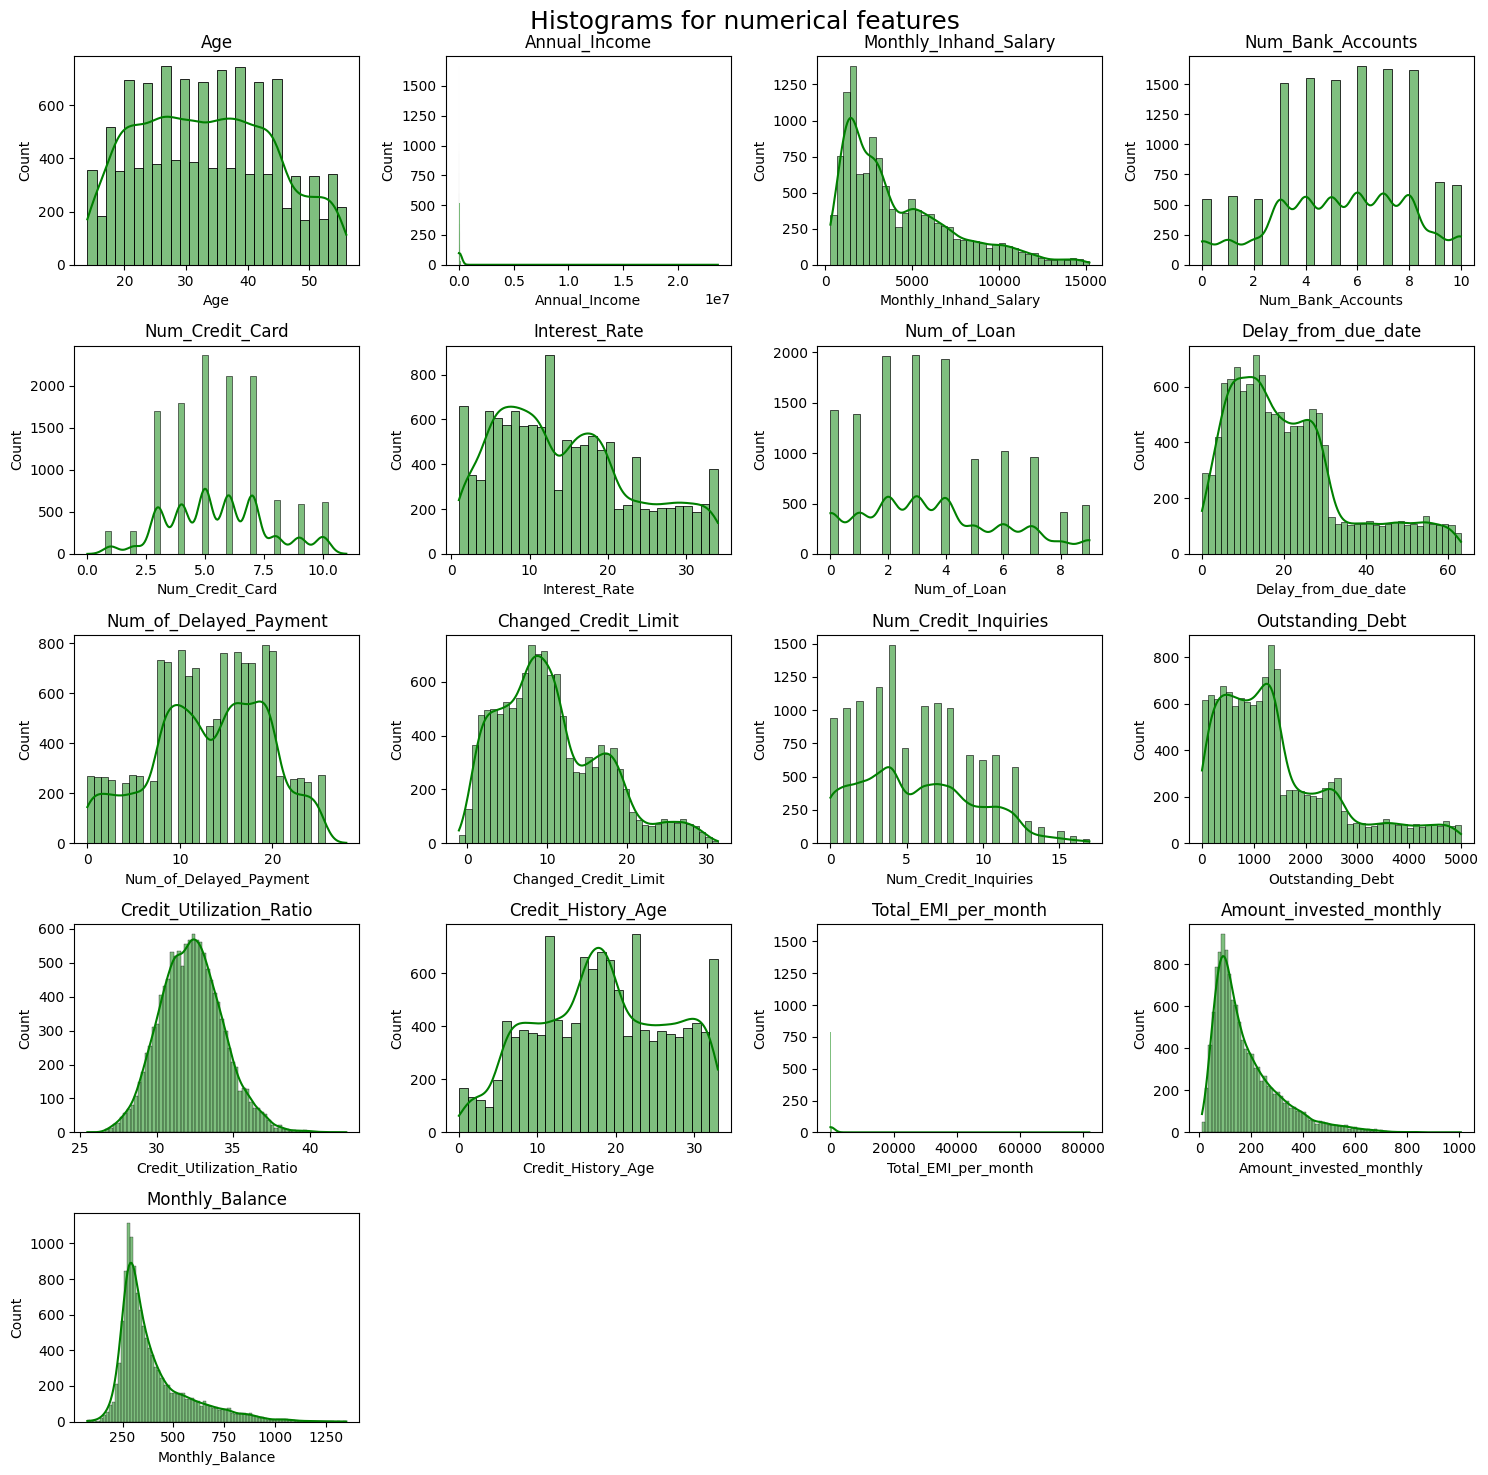

In [464]:
# Histograms for numerical columns
num_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
           'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
           'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
           'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
           'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

plt.figure(figsize=(15,15))
for i, elem in enumerate(num_columns):
  plt.subplot(5,4,i+1)
  sns.histplot(df_aggregated[elem], kde=True, color='green')
  plt.title(elem)

plt.suptitle("Histograms for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

In [465]:
# Creating numerical_df
numerical_df = df_aggregated[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                              'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                              'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                              'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]

In [466]:
# Skewness Coefficient
numerical_df
print("Skewness Coefficient")
print("-" * 20)
print(numerical_df.skew().round(4))

Skewness Coefficient
--------------------
Age                         0.16
Annual_Income              11.87
Monthly_Inhand_Salary       1.13
Num_Bank_Accounts          -0.19
Num_Credit_Card             0.23
Interest_Rate               0.50
Num_of_Loan                 0.45
Delay_from_due_date         0.99
Num_of_Delayed_Payment     -0.22
Changed_Credit_Limit        0.72
Num_Credit_Inquiries        0.42
Outstanding_Debt            1.21
Credit_Utilization_Ratio    0.28
Credit_History_Age         -0.05
Total_EMI_per_month         7.40
Amount_invested_monthly     1.57
Monthly_Balance             1.61
dtype: float64


**🔍OBSERVATION🔎**
- Annual_Income (11.87): Highly positively skewed, indicating a small number of individuals with very high incomes.
- Credit_Utilization_Ratio (0.28): Mildly positively skewed, with a few high ratios compared to the average.

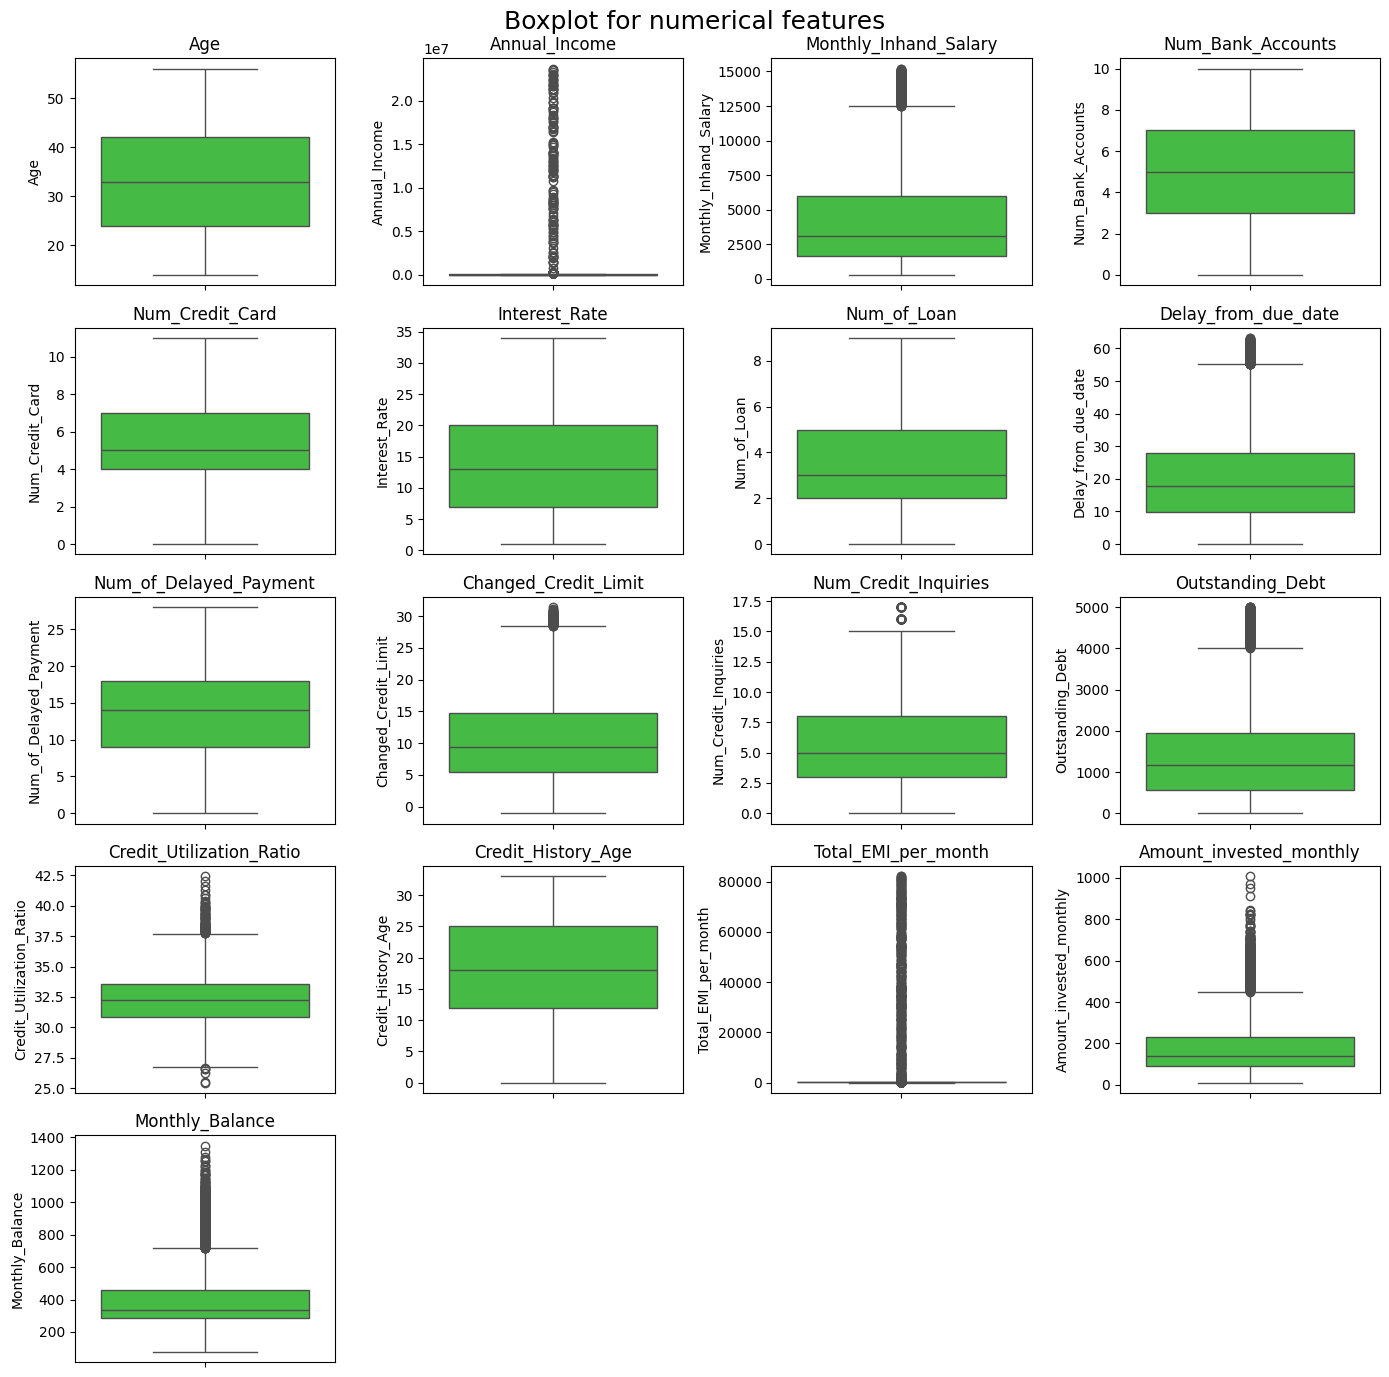

In [467]:
# Box plots for numerical columns
palette = ['#32CD32']

plt.figure(figsize=(14, 14))
for i, col in enumerate(num_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(df_aggregated[col],palette = palette)
    plt.title(col)

plt.suptitle("Boxplot for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

### <font color=#00836c>**8.2) Bivariate Analysis📉💹**</font>

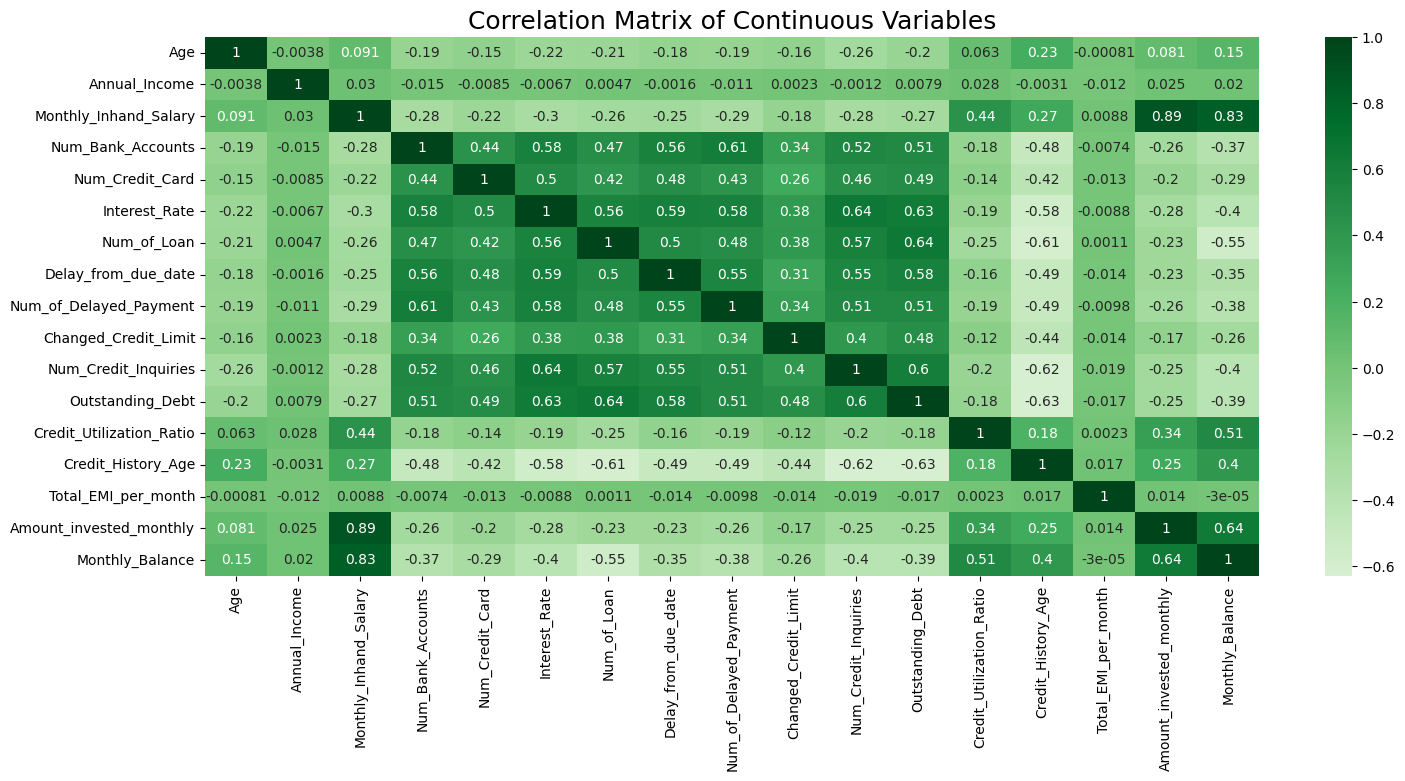

In [468]:
# Correlation Matrix of Continuous Variables
plt.figure(figsize=(17, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Greens',center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

**🔍OBSERVATION🔎**
- **High Correlations with Monthly Balance:**

    - Monthly_Inhand_Salary (0.83) and Amount_invested_monthly (0.64) show strong positive correlations with Monthly_Balance. This indicates that individuals with higher monthly salaries and investment amounts tend to have higher monthly balances.

- **Credit Utilization and Outstanding Debt:**

    - Credit_Utilization_Ratio (0.51) and Outstanding_Debt (-0.39) both show positive and negative correlations respectively with Monthly_Balance. High credit utilization and lower outstanding debt are associated with higher and lower monthly balances respectively, which may suggest that higher credit usage contributes to smaller available balances.

- **Negative Correlations with Credit History Age:**

    - Credit_History_Age has a negative correlation with several features, including Num_Bank_Accounts (-0.48) and Num_Credit_Card (-0.42). This suggests that a longer credit history may be associated with fewer accounts and credit cards.
  
- **Interest Rate and Credit Mix:**

    - Interest_Rate has a strong positive correlation with Num_of_Loan (0.56) and Num_Credit_Inquiries (0.64), indicating that higher interest rates are often associated with a higher number of loans and credit inquiries.

- **Delay from Due Date and Num_of_Delayed_Payment:**

    - Delay_from_due_date (0.55) and Num_of_Delayed_Payment (0.34) are positively correlated, suggesting that greater delays in payments are associated with more instances of delayed payments.
    
- **Annual Income and Other Features:**

    - Annual_Income has low correlations with other features, suggesting it may not be strongly related to other financial behaviors or attributes in this dataset.

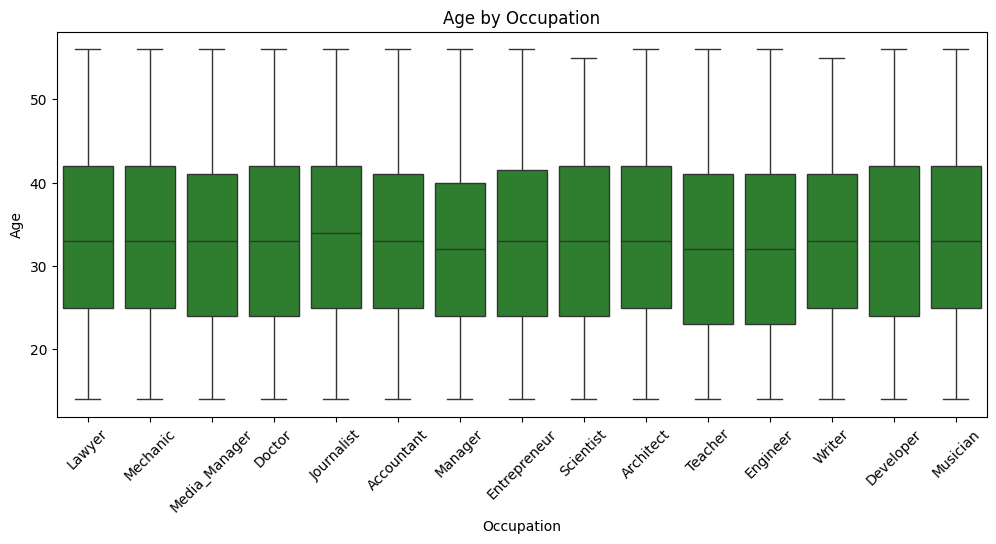

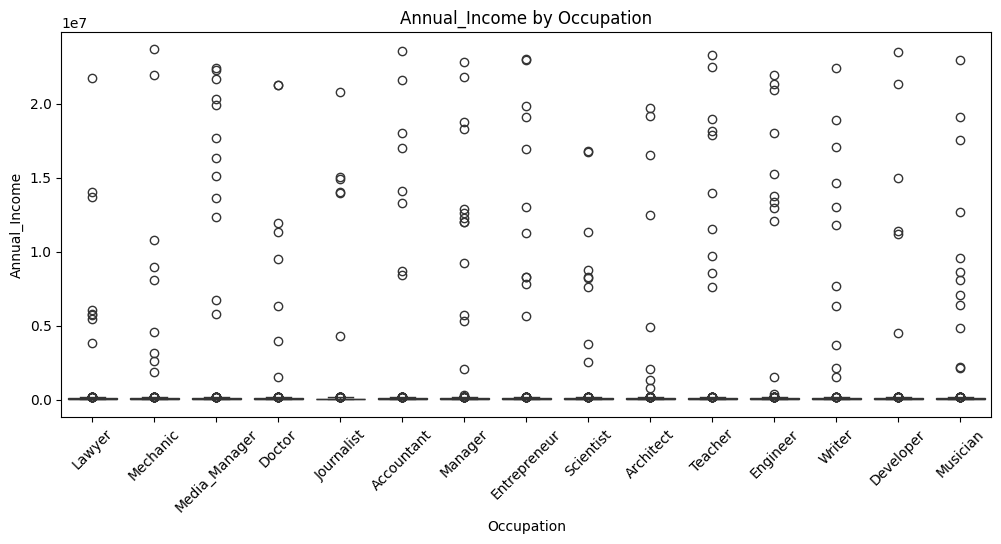

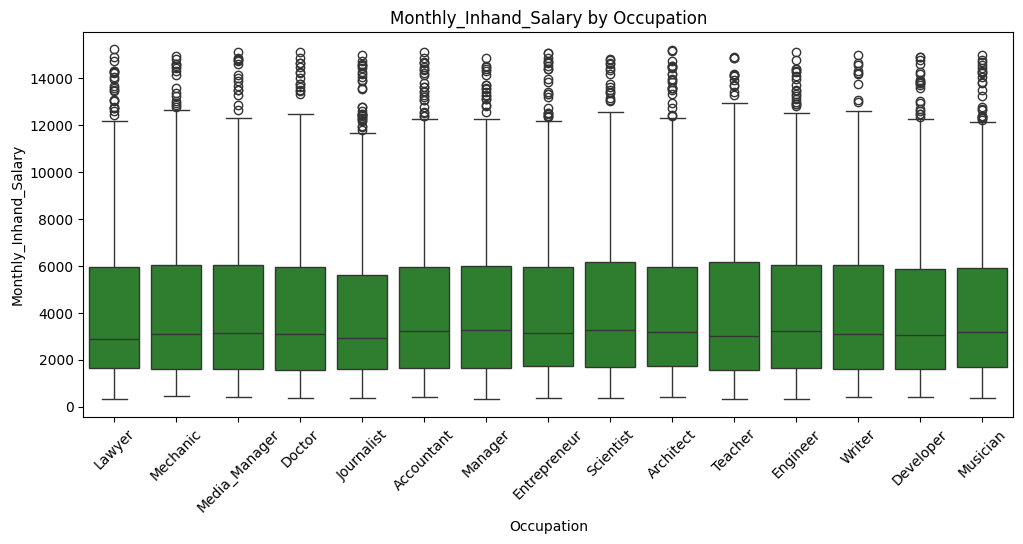

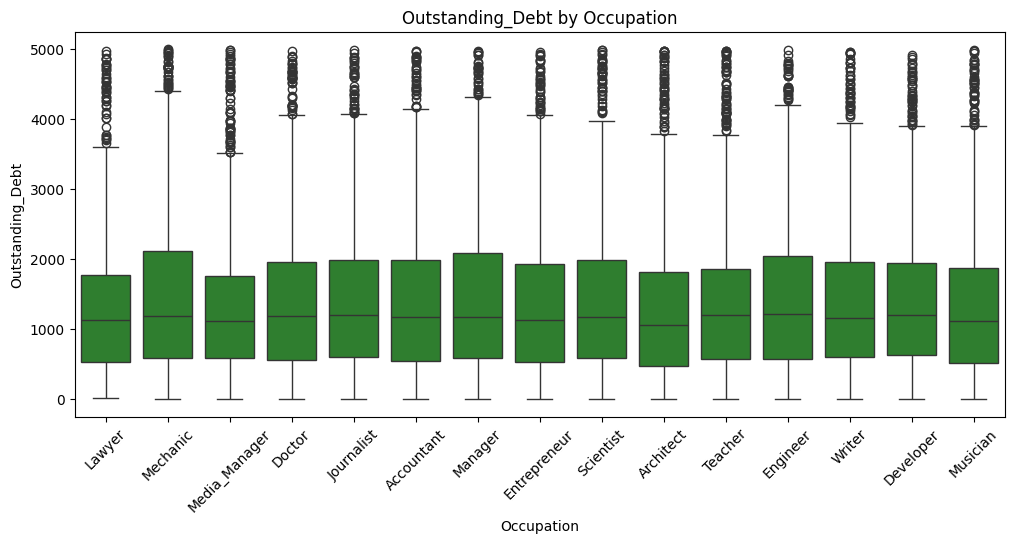

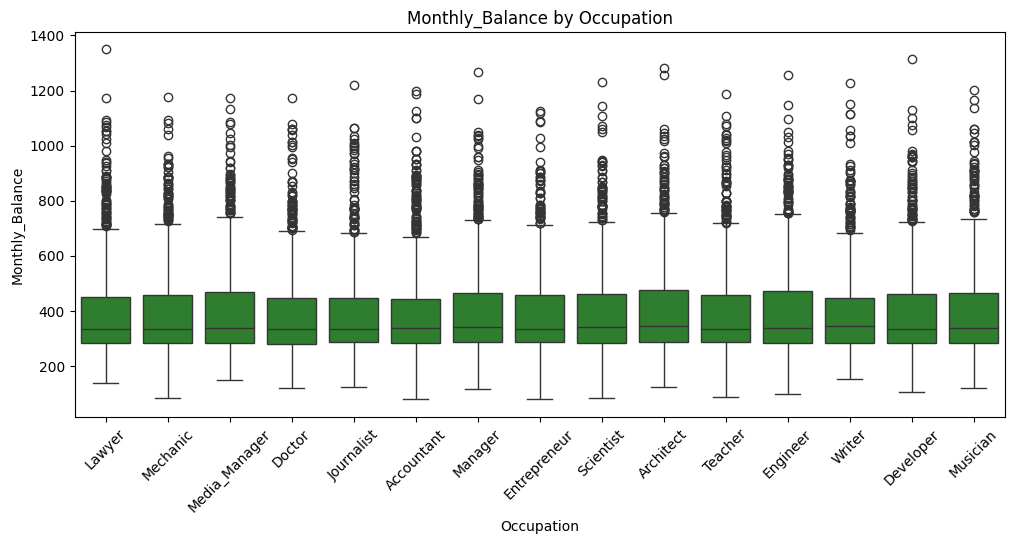

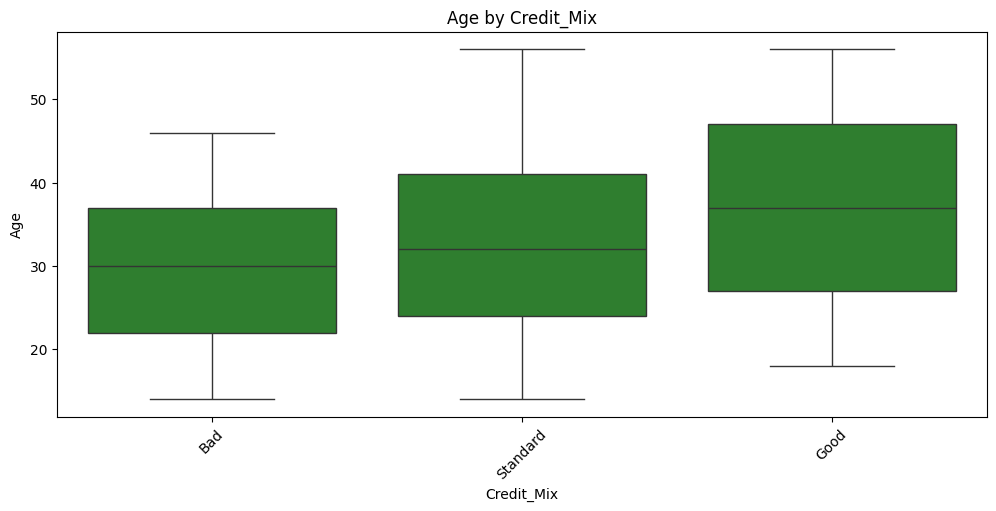

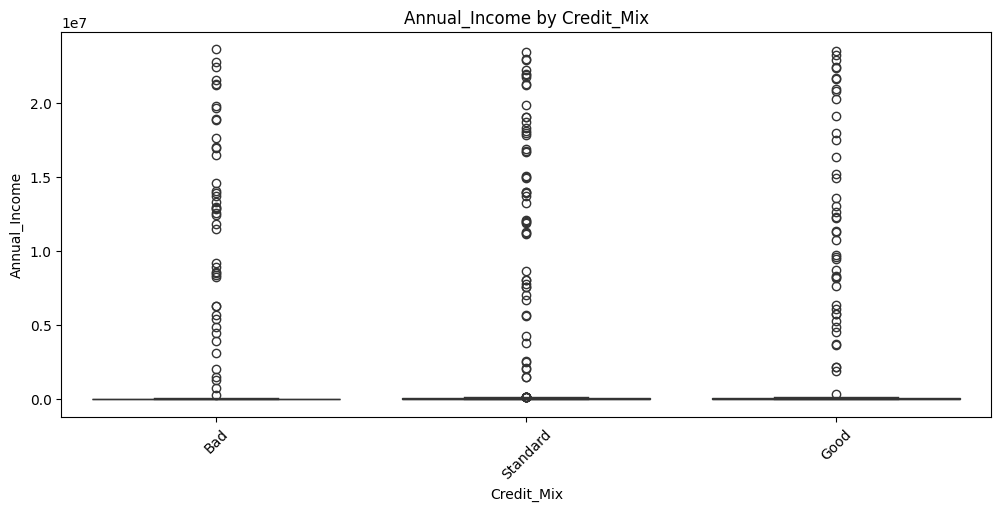

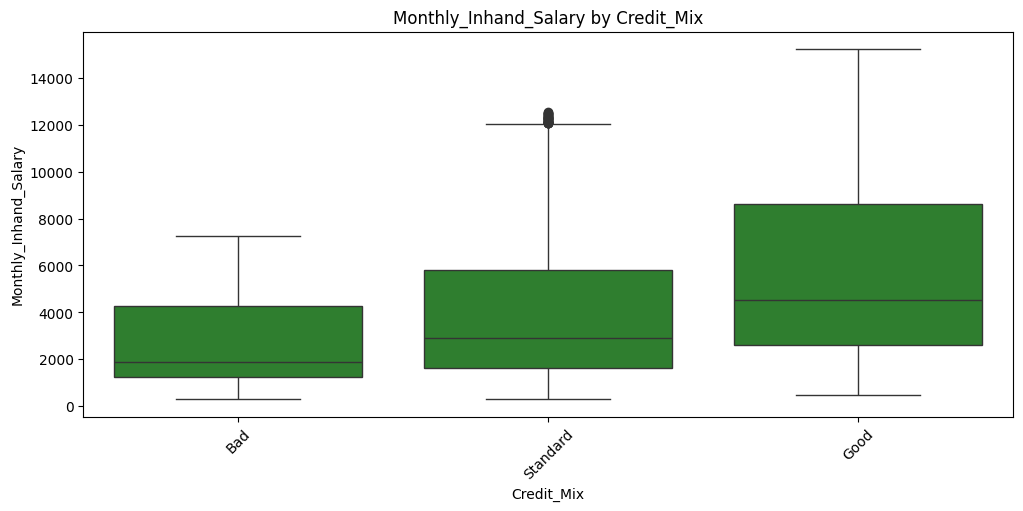

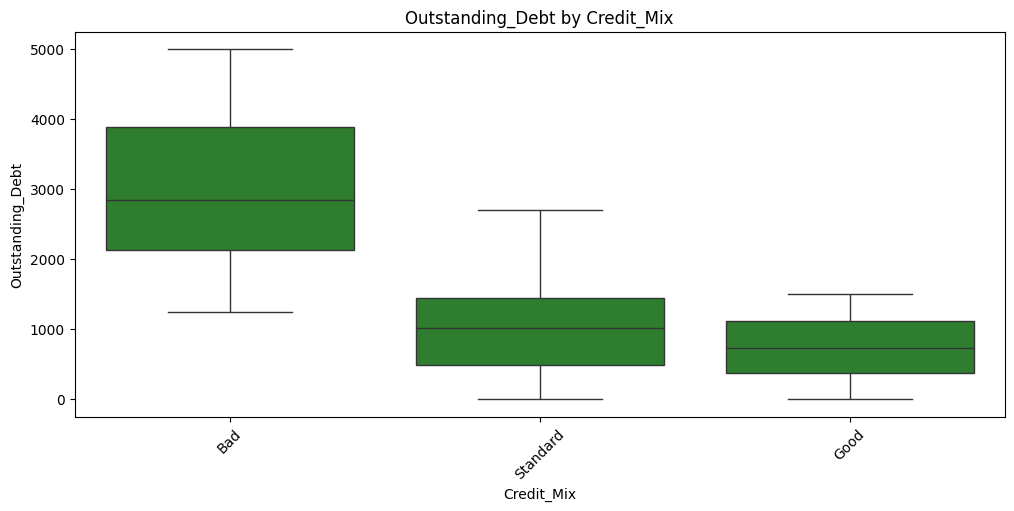

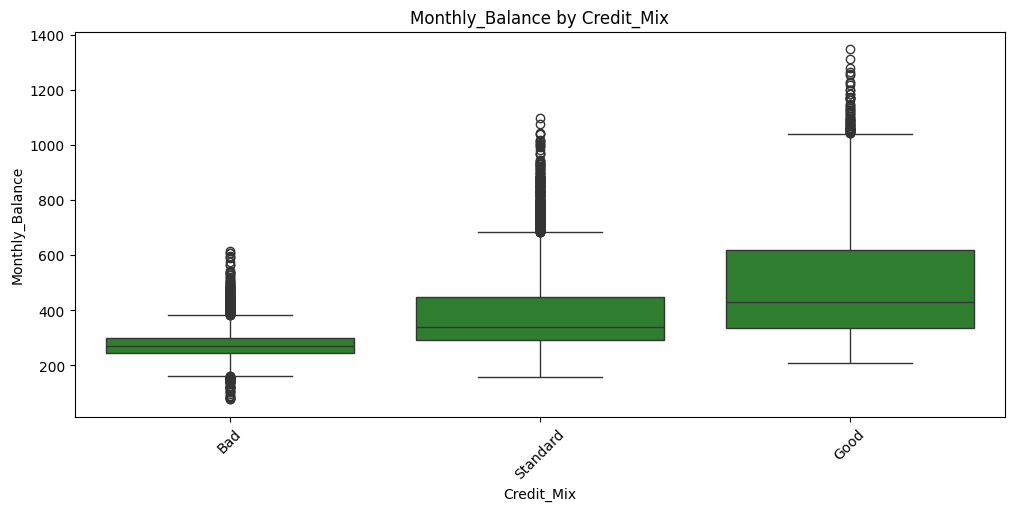

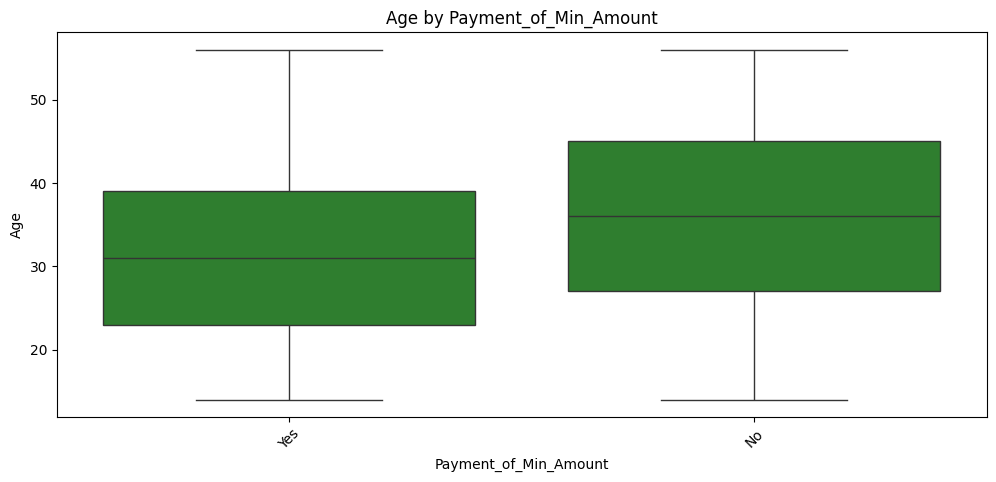

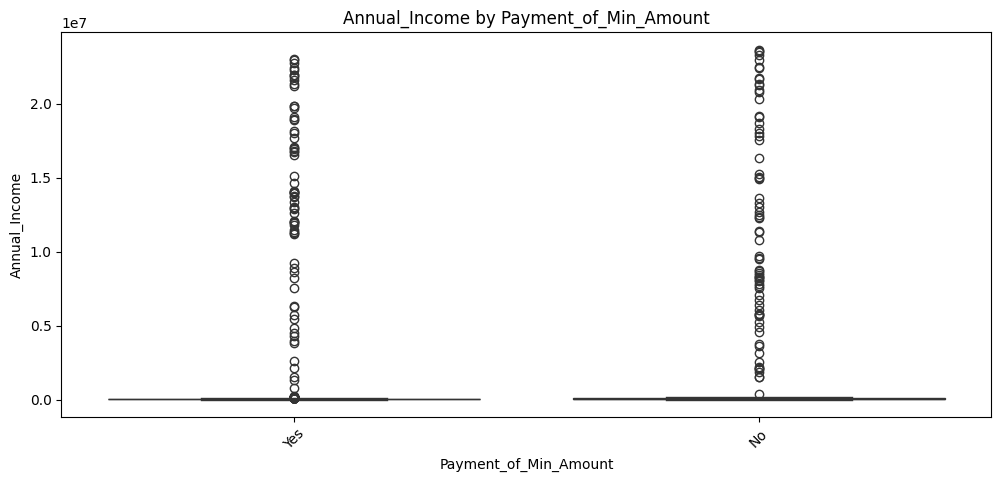

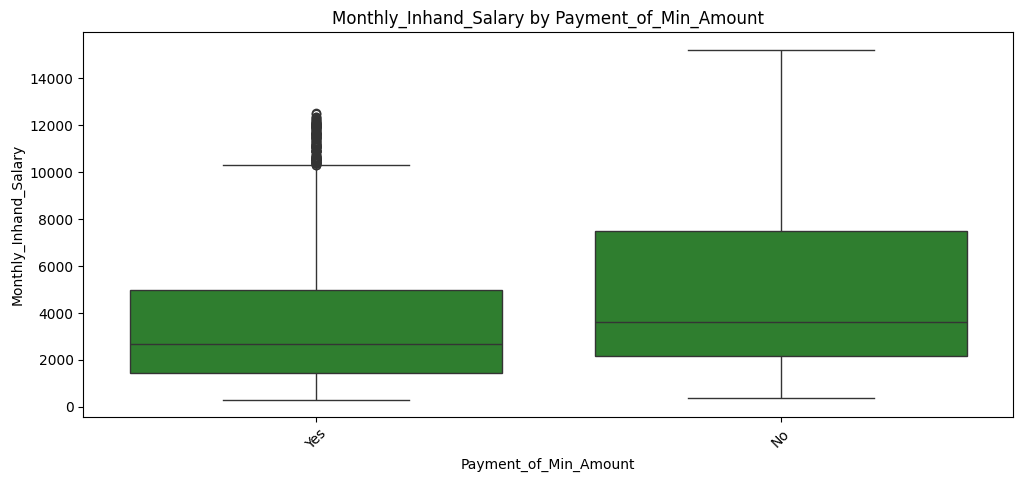

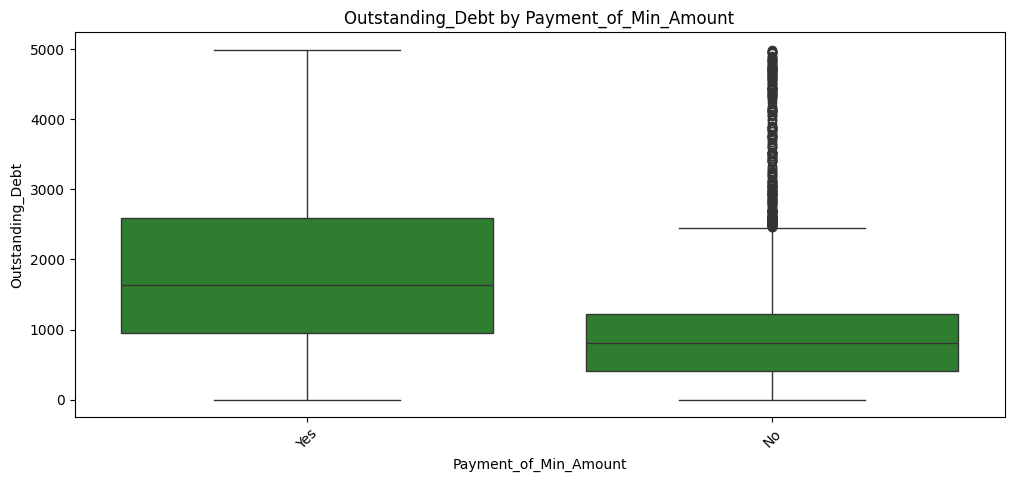

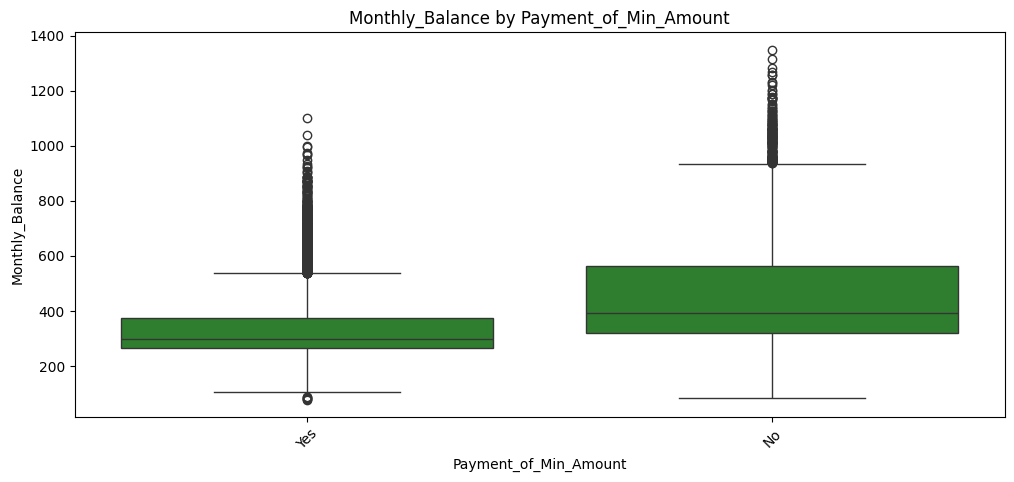

In [469]:
# Categorical vs. Numerical
palette = ['#228B22']
for column in ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']:
    for i, num_column in enumerate(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
        plt.figure(figsize=(12, 5))
        sns.boxplot(x=df_aggregated[column], y=df_aggregated[num_column], palette=palette)
        plt.title(f'{num_column} by {column}')
        plt.xticks(rotation=45)
        plt.show()

In [470]:
# Median values for Credit_Mix
print("Median values for Credit_Mix:")
print("-" * 30)
for elem in (['Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
  print(f"Column Name: {elem}")
  print(df_aggregated.groupby('Credit_Mix')[elem].median())
  print()
  print("-" * 50)

Median values for Credit_Mix:
------------------------------
Column Name: Age
Credit_Mix
Bad        30.00
Good       37.00
Standard   32.00
Name: Age, dtype: float64

--------------------------------------------------
Column Name: Monthly_Inhand_Salary
Credit_Mix
Bad        1879.71
Good       4509.36
Standard   2927.62
Name: Monthly_Inhand_Salary, dtype: float64

--------------------------------------------------
Column Name: Outstanding_Debt
Credit_Mix
Bad        2849.38
Good        732.22
Standard   1019.44
Name: Outstanding_Debt, dtype: float64

--------------------------------------------------
Column Name: Monthly_Balance
Credit_Mix
Bad        269.91
Good       429.46
Standard   340.38
Name: Monthly_Balance, dtype: float64

--------------------------------------------------


**🔍OBSERVATION🔎**

- **Age:** Individuals classified under "Good" credit mix tend to be older (median age of 37) compared to those with "Bad" credit (median age of 30). This suggests that older individuals may have better credit profiles.

- **Monthly Inhand Salary:** Those with a "Good" credit mix have a significantly higher median monthly inhand salary (4509.36) compared to individuals with "Bad" credit (1879.71). This indicates a positive correlation between higher income and better credit mix.

- **Outstanding Debt:** Individuals with a "Good" credit mix have a lower median outstanding debt (732.22) compared to those with "Bad" credit (2849.38). Lower outstanding debt is associated with better credit profiles.

- **Monthly Balance:** Individuals with a "Good" credit mix have a higher median monthly balance (429.46) than those with a "Bad" credit mix (269.91). This suggests that maintaining a higher monthly balance is linked to a better credit mix.

In summary, individuals with a "Good" credit mix generally have higher incomes, lower outstanding debts, and higher monthly balances, while they are also older compared to those with a "Bad" credit mix.

In [471]:
# Median values for Payment_of_Min_Amount
print("Median values for Payment_of_Min_Amount:")
print("-" * 45)
for elem in (['Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
  print(f"Column Name: {elem}")
  print(df_aggregated.groupby('Payment_of_Min_Amount')[elem].median())
  print()
  print("-" * 50)

Median values for Payment_of_Min_Amount:
---------------------------------------------
Column Name: Age
Payment_of_Min_Amount
No    36.00
Yes   31.00
Name: Age, dtype: float64

--------------------------------------------------
Column Name: Monthly_Inhand_Salary
Payment_of_Min_Amount
No    3621.15
Yes   2682.48
Name: Monthly_Inhand_Salary, dtype: float64

--------------------------------------------------
Column Name: Outstanding_Debt
Payment_of_Min_Amount
No     807.00
Yes   1639.90
Name: Outstanding_Debt, dtype: float64

--------------------------------------------------
Column Name: Monthly_Balance
Payment_of_Min_Amount
No    393.49
Yes   298.19
Name: Monthly_Balance, dtype: float64

--------------------------------------------------


**🔍OBSERVATION🔎**

- **Age:** Individuals who do not pay the minimum amount (No) are generally older (median age of 36) compared to those who do pay the minimum amount (Yes) with a median age of 31. This suggests that younger individuals may be more likely to pay the minimum amount.

- **Monthly Inhand Salary:** Individuals who do not pay the minimum amount have a higher median monthly inhand salary (3621.15) compared to those who do pay the minimum amount (2682.48). Higher salaries are associated with a lower likelihood of paying only the minimum amount.

- **Outstanding Debt:** Those who do not pay the minimum amount have a lower median outstanding debt (807.00) compared to those who do pay the minimum amount (1639.90). Higher outstanding debt is linked to the habit of paying only the minimum amount.

- **Monthly Balance:** Individuals who do not pay the minimum amount have a higher median monthly balance (393.49) compared to those who do pay the minimum amount (298.19). A higher monthly balance is associated with the ability to pay more than the minimum amount.

In summary, individuals who do not pay only the minimum amount tend to be older, have higher salaries, lower outstanding debts, and higher monthly balances compared to those who do pay only the minimum amount.

## **9) Hypothetical Credit Score Calculation🔢**

In [472]:
# Deep copy
df_cleaned_final = df_cleaned.copy()
df_aggregated_final = df_aggregated.copy()

**Objective:**

To develop a hypothetical credit score calculation methodology inspired by FICO scores using a relevant set of features. The methodology will include calculating scores based on selected features, applying a weighting scheme, and scaling the final scores.

### <font color=#00836c>**9.1) Calculate credit score**</font>

**Feature Selection**

Based on the correlation matrix and prior analysis, the following features are selected for calculating the hypothetical credit score:

1. Monthly_Inhand_Salary: Strong positive correlation with Monthly Balance.
2. Amount_invested_monthly: Significant positive correlation with Monthly Balance.
3. Credit_Utilization_Ratio: Positive correlation with Monthly Balance, affects creditworthiness.
4. Outstanding_Debt: Shows a negative correlation with Monthly Balance and affects credit risk.
5. Num_Credit_Inquiries: Higher number of inquiries may indicate higher credit risk.
6. Interest_Rate: Affects the cost of borrowing and hence creditworthiness.
7. Num_of_Loan: Reflects the current credit obligations.
8. Delay_from_due_date: Indicates payment behavior and potential risk.
9. Monthly_Balance: Direct measure of financial health.

In [473]:
features = {
    'Monthly_Inhand_Salary': 0.15,
    'Amount_invested_monthly': 0.15,
    'Credit_Utilization_Ratio': 0.10,
    'Outstanding_Debt': 0.10,
    'Num_Credit_Inquiries': 0.10,
    'Interest_Rate': 0.10,
    'Num_of_Loan': 0.10,
    'Delay_from_due_date': 0.10,
    'Monthly_Balance': 0.10
}

In [474]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the selected features
scaler = MinMaxScaler()
df_aggregated_final[list(features.keys())] = scaler.fit_transform(df_aggregated_final[list(features.keys())])

# Calculate credit score
df_aggregated_final['Credit_Score'] = sum(df_aggregated_final[feature] * weight for feature, weight in features.items())

# Scale to 300-850
df_aggregated_final['Credit_Score'] = df_aggregated_final['Credit_Score'] * (850 - 300) + 300

### <font color=#00836c>**9.2) Bin scores**</font>

In [475]:
bins = [300, 499, 649, 749, 850]
labels = ['Poor Credit', 'Fair Credit', 'Good Credit', 'Excellent Credit']
df_aggregated_final['Credit_Score_Binned'] = pd.cut(df_aggregated_final['Credit_Score'], bins=bins, labels=labels)

#### <font color=#fa7f22>**9.2.1) Distribution of Credit Scores**</font>

In [499]:
df_aggregated_final[['Customer_ID','Credit_Score']]

,Customer_ID,Credit_Score
0,CUS_0x1000,525.16
1,CUS_0x1009,428.58
2,CUS_0x100b,468.89
3,CUS_0x1011,463.48
4,CUS_0x1013,469.86
...,...,...
12495,CUS_0xff3,403.72
12496,CUS_0xff4,445.03
12497,CUS_0xff6,462.49
12498,CUS_0xffc,567.07


In [476]:
df_aggregated_final['Credit_Score_Binned'].value_counts()

,count
Credit_Score_Binned,
Poor Credit,8634
Fair Credit,3866
Good Credit,0
Excellent Credit,0


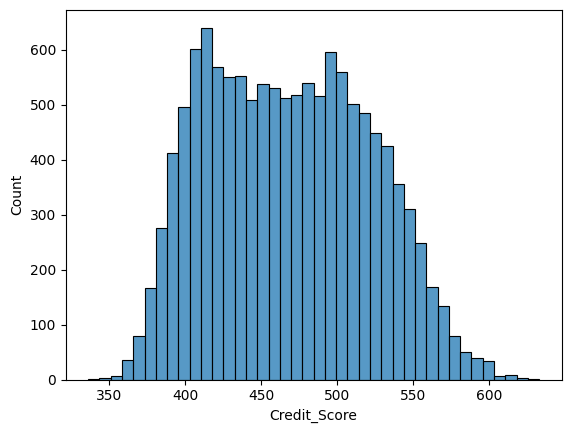

In [477]:
sns.histplot(df_aggregated_final['Credit_Score'])
plt.show()

**🔍OBSERVATION🔎**

- **Credit Score Distribution:** The majority of customers fall into the "Poor Credit" category, with **8,634 individuals**. This suggests that the weighted credit score calculation, based on the selected features and their weights, tends to assign lower credit scores to most customers.

- **Lack of Higher Credit Scores:** No customers fall into the "Good Credit" or "Excellent Credit" categories. This could indicate that the scoring methodology, weights, or normalization process may not be adequately capturing the variations needed to differentiate between good and excellent credit.

- **Feature Impact:** The selected features and their weights might need reevaluation. For example, the equal weight distribution across features may not reflect their actual impact on creditworthiness. This equal weighting could lead to suboptimal scoring where some features might dominate the score, skewing the results.

- **Further Analysis Required:** The absence of higher credit score categories suggests that further adjustments might be necessary. Consider experimenting with different weighting schemes, revisiting feature selection, or recalibrating the scoring model to ensure a more balanced distribution of credit scores.

In summary, the observed distribution highlights that **most customers are categorized with poor credit, and there is a need to reassess the methodology to better capture and represent varying levels of creditworthiness.**

### <font color=#00836c>**9.3) Time Frame Analysis for last 3 months**</font>

Explore how credit scores and aggregated features vary over different time frames such as the last 3 months. This will help in understanding the temporal aspect of creditworthiness.

#### <font color=#fa7f22>**9.3.1) Calculate RFM**</font>

- **Recency Calculation:**

    - For each customer, calculate the recency based on the last month of payment.

- **Frequency Calculation:**

    - Number of loans taken by each customer.

- **Monetary Calculation:**

    - Sum the Monthly balance amounts for each customer.

In [478]:
# Recency calculation
df_cleaned_final['Recency'] = df_cleaned_final.groupby('Customer_ID')['Month_num'].transform(lambda x: x.max() - x)

# Frequency calculation
df_cleaned_final['Frequency'] = df_cleaned_final.groupby('Customer_ID')['Num_of_Loan'].transform('max')

# Monetary calculation
df_cleaned_final['Monetary'] = df_cleaned_final.groupby('Customer_ID')['Monthly_Balance'].transform('sum')

In [481]:
# Filter data for the last 3 months
recent_data_final = df_cleaned_final[df_cleaned_final['Month_num'] >= (df_cleaned_final['Month_num'].max() - 3)]

In [482]:
# Recalculate RFM features
df_recent_rfm_final = recent_data_final.groupby('Customer_ID').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

In [485]:
# Merge with aggregated data
df_recent_aggregated_final = df_aggregated_final.merge(df_recent_rfm_final, on='Customer_ID', how='left')

**Feature Selection:**

- Recency: Recent interactions can indicate more current credit behavior.
- Frequency: Regular usage of credit can reflect on-going creditworthiness.
- Monetary: High balances may indicate better financial management or higher risk.
- Credit Utilization Ratio: High utilization might signal higher risk.
- Outstanding Debt: High debt could indicate higher risk of default.

In [487]:
# Define the weights for each feature
weights = {
    'Recency': 0.20,
    'Frequency': 0.15,
    'Monetary': 0.15,
    'Credit_Utilization_Ratio': 0.25,
    'Outstanding_Debt': 0.25
}

In [488]:
from sklearn.preprocessing import MinMaxScaler

# List of features to be scaled
features_to_scale = ['Recency', 'Frequency', 'Monetary', 'Credit_Utilization_Ratio', 'Outstanding_Debt']

scaler = MinMaxScaler()
df_recent_aggregated_final[features_to_scale] = scaler.fit_transform(df_recent_aggregated_final[features_to_scale])

In [489]:
# Recalculate and bin credit scores
df_recent_aggregated_final['Credit_Score'] = sum(df_recent_aggregated_final[feature] * weight for feature, weight in weights.items())
df_recent_aggregated_final['Credit_Score'] = df_recent_aggregated_final['Credit_Score'] * (850 - 300) + 300

In [490]:
# Bins
df_recent_aggregated_final['Credit_Score_Binned'] = pd.cut(df_recent_aggregated_final['Credit_Score'], bins=bins, labels=labels)

#### <font color=#fa7f22>**9.3.2) Distribution of Credit Scores**</font>

In [496]:
df_recent_aggregated_final[['Customer_ID','Credit_Score']]

,Customer_ID,Credit_Score
0,CUS_0x1000,443.10
1,CUS_0x1009,400.50
2,CUS_0x100b,450.11
3,CUS_0x1011,374.79
4,CUS_0x1013,439.57
...,...,...
12495,CUS_0xff3,434.17
12496,CUS_0xff4,436.43
12497,CUS_0xff6,423.74
12498,CUS_0xffc,501.28


In [497]:
# Compare distributions
df_recent_aggregated_final['Credit_Score_Binned'].value_counts()

,count
Credit_Score_Binned,
Poor Credit,10712
Fair Credit,1788
Good Credit,0
Excellent Credit,0


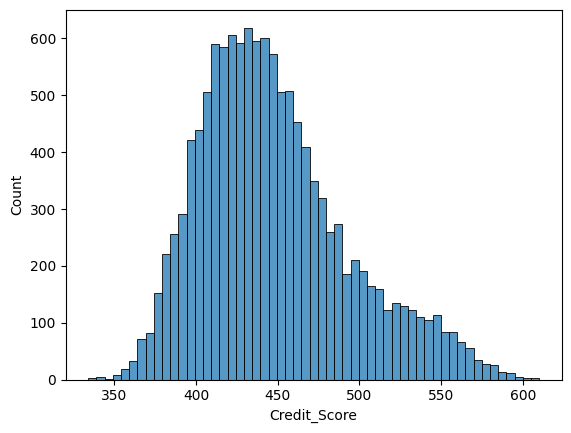

In [498]:
sns.histplot(df_recent_aggregated_final['Credit_Score'])
plt.show()

**🔍OBSERVATION🔎**

- Based on the results of the time frame analysis, here are the key observations to include:

- **Increased Poor Credit Classification:** The number of customers classified as "Poor Credit" has **increased significantly to 10,712, compared to the earlier analysis**. This suggests that **recent data** might be revealing **more financial distress or challenges among customers, particularly in the last 3 month**s.

- **Decreased Fair Credit Classification:** The count of customers in the **"Fair Credit" category has decreased to 1,788**, which is a significant drop compared to the previous result. This indicates that recent data may be emphasizing lower credit scores, possibly due to recent changes in customer behavior or financial situations.

- **Absence of Higher Credit Scores:** There are still no customers classified under "Good Credit" or "Excellent Credit." This persistent absence in the higher credit score categories indicates that the current scoring methodology or the recent data may not sufficiently differentiate high creditworthiness.

- Impact of Recency, Frequency, and Monetary Factors: The inclusion of recency, frequency, and monetary metrics in the analysis seems to have intensified the classification into lower credit categories. This might suggest that **recent activity and monetary behavior have a significant impact on the calculated credit scores.**

- **Further Investigation Needed:** The shift in credit score distribution after incorporating recency-based metrics indicates a need for further investigation. It might be necessary to adjust the feature weights, revisit the scaling approach, or consider additional factors to better capture a range of creditworthiness levels.

In summary, the analysis of recent data shows an increased concentration of customers in the "Poor Credit" category and highlights the **need to reassess the scoring methodology to better capture a range of creditworthiness.**








## **10) Analysis and Insights**


- <font color=#00836c>**Credit Mix Impact:**</font> The median values for different credit mix categories (Bad, Good, Standard) indicate that **individuals with "Bad" credit tend to have higher outstanding debt and lower monthly income compared to those with "Good" or "Standard" credit.** This highlights the importance of credit management and debt reduction in improving credit scores.

- <font color=#00836c>**Recency, Frequency, and Monetary (RFM) Analysis:**</font> The recency, frequency, and monetary calculations over the last 3 months reveal that customers with more recent interactions and higher monetary values generally show better credit behaviors. This insight underscores the importance of recent payment behavior in credit scoring.

- <font color=#00836c>**Time Frame Analysis Results:**</font> The **significant increase in the proportion of "Poor Credit" in recent analyses** compared to the overall dataset suggests **that more recent credit behavior is a stronger predictor of creditworthiness. This implies that incorporating recency into credit scoring can enhance its accuracy.**

- <font color=#00836c>**Machine Learning Model Evaluation:**</font> The initial hypothetical credit score calculation and binning show that the majority of customers fall into the "Poor Credit" category, which may indicate the **need for recalibration or additional features** in the scoring model. Machine learning models can help refine the scoring criteria and improve predictive accuracy by identifying key features and interactions that affect credit scores.

These insights can guide adjustments in credit scoring methodologies, feature engineering, and model improvements to better reflect customer creditworthiness and behavior.



---



---



**By**

SANKARAN MEENAKSHI SUNDARAM

DSML July 2023